# Разработка прогнозной модели «ЭкоФерма» для отбора буренок

***1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);***

***2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).***

Краткое описание данных

К нам обратился фермер, владелец молочного хозяйства **«Вольный луг»**. Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ **«ЭкоФерма»**.
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. 

Что требуется от нашей модели:

***С помощью модели нужно отобрать коров по двум критериям:***
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.


## Описание данных

Нам доступно три датасета:
- `ferma_main.csv`;
- `ferma_dad.csv`;
- `cow_buy.csv`.

***Описание данных `ferma_main.csv`:***
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

    Признаки в датасете `ferma_main.csv` можно разделить на группы:
    - Характеристики коровы: id, Порода, порода папы_быка, Возраст.
    - Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
    - Характеристика пастбища: Тип пастбища.
    - Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

***Описание данных `ferma_dad.csv`:***
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

***Описание данных `cow_buy.csv`:***
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

    Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
    1. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
    2. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
    3. Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

##### План работы

##### Шаг 1. Загрузка и изучение данных.

1. Загрузите данные в датафреймы pandas.
    - /datasets/ferma_main.csv
    - /datasets/ferma_dad.csv
    - /datasets/cow_buy.csv
2. Изучить данные. Определить, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименовать столбцы.
    
##### Шаг 2. Предобработка данных.

Проверьте данные на наличие пропусков и дубликатов. Узнать, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

##### Шаг 3. Исследовательский анализ данных.

Проведите статистический анализ всех признаков.
Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
Сделайте выводы о данных:
напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
расскажите, как вы планируете улучшить данные.

##### Шаг 4. Провести корреляционный анализ признаков в датасете ferma_main.csv.

Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
Сделайте выводы о взаимосвязи признаков.
Какой тип взаимосвязи между целевым и входными признаками?
Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
Наблюдается ли мультиколлинеарность между входными признаками?

##### Шаг 5. Задача регрессии.

1. Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
3. Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
6. С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

##### Шаг 6. Задача классификации.

1. Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
2. Проанализируйте модель логистической регрессии.
3. С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

##### Шаг 7. Итоговые выводы.

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 13.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 93.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [1]:
# Библиотеки для работы с массивами данных
import numpy as np
import pandas as pd
# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Библиотеки для разделения данных на выборки и инициализации моделей МО 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Библиотеки для оценки полученных результатов
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
# Библиотеки для масштабирования данных
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

## Загрузка данных

###### 1. Загрузите данные в датафреймы pandas. Файлы можно скачать по ссылкам в описании, они даже доступны через пути:
- `/datasets/ferma_main.csv`
- `/datasets/ferma_dad.csv`
- `/datasets/cow_buy.csv`

In [2]:
try:
    df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal=',')
    df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal=',')
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal=',')
except:
    df_ferma_main = pd.read_csv('./ferma_main.csv', sep = ';', decimal=',')
    df_ferma_dad = pd.read_csv('./ferma_dad.csv', sep = ';', decimal=',')
    df_cow_buy = pd.read_csv('./cow_buy.csv', sep = ';', decimal=',')

###### 2. Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

In [3]:
display(df_ferma_main.shape)

df_ferma_main.info()

display(df_ferma_main.head())

(634, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


В датафрейме `df_ferma_main` 12 признаков и 634 объекта. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Привести столбцы к нужным типам данным и проверить на дубликаты.

In [4]:
display(df_ferma_dad.shape)

df_ferma_dad.info()

(df_ferma_dad.head())

(629, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


В датафрейме `df_ferma_dad` 2 признаков и 629 объекта. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Необходимо проверить на дубликаты, так как с первых строк они обнаружены в данных.

In [5]:
display(df_cow_buy.shape)

df_cow_buy.info()

display(df_cow_buy.head())

(20, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


В датафрейме `df_cow_buy` 7 признаков и 20 объекта. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Необходимо проверить на дубликаты, так как с первых строк они обнаружены в данных.

***Общий вывод по загруженным данным***

1. В датафрейме `df_ferma_main` `12 признаков` и `634 объекта`. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Привести столбцы к нужным типам данным и проверить на дубликаты.

2. В датафрейме `df_ferma_dad` `2 признаков` и `629 объекта`. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Необходимо проверить на дубликаты, так как с первых строк они обнаружены в данных.

3. В датафрейме `df_cow_buy` `7 признаков` и `20 объекта`. Из сводной информации по данным видно, что пропущенных значений нет, все столбцы полностью заполнены. Есть необходимость переименовать названия столбцов. Необходимо проверить на дубликаты, так как с первых строк они обнаружены в данных.

##  Предобработка данных

###### Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

In [6]:
df_ferma_main.columns = ['id', 'milk_yield_kg', 'eke', 'crude_protein_gr', 
                        'spo', 'breed', 'type_of_pasture', 'daddy_breed',
                        'fat_content', 'protein', 'the_taste_of_milk', 'age']
df_ferma_main.head()

,id,milk_yield_kg,eke,crude_protein_gr,spo,breed,type_of_pasture,daddy_breed,fat_content,protein,the_taste_of_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Функция вывода пропусков по столбцам

In [7]:
def number_of_passes(df):
    print(f'Количество пропусков по столбцам:\n{df.isna().sum()}')

Функция вывода дубликатов

In [8]:
def number_of_duplicates(df):
    print(f'Количество дубликатов:\n{df.duplicated().sum()}')

Функция вывода удаленных дубликатов

In [9]:
def drop_duplicat_data(df, subset=None):
    df = df.drop_duplicates(subset=subset, keep="first").reset_index(drop=True)
    print(f'Количество дубликатов после удаления: {df.duplicated().sum()}')
    return df

Функция проверки категориальных переменных в столбцах

In [10]:
def check_category_sign(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f'Уникальные значения в столбце {col}: {unique_values}')

Функция приведения текстовых данных к одному стилю

In [11]:
def preprocessing_for_of_text(df):
    for col in df.columns:
        df[col] = df[col].str.lower()
    print("Текстовые данные успешно приведены к одному стилю.")
    return df

Функция для изменения категорий и избавления от дубликатов

In [12]:
def type_of_past(row):
    try:
        if 'равнин' in row:
            return 'равнинное'
        if 'холмист' in row:
            return 'холмистое'
    except:
        return 'нет значения'
    
def daddy_rename(row):
    try:
        if 'айдиа' in row:
            return 'айдиал'
        if 'совер' in row:
            return 'соверин'
    except:
        return 'нет значения'

In [13]:
check_category_sign(df_ferma_main[['breed', 'type_of_pasture', 'daddy_breed', 'the_taste_of_milk', 'age']])

Уникальные значения в столбце breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце type_of_pasture: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце daddy_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в столбце the_taste_of_milk: ['вкусно' 'не вкусно']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [14]:
df_category_text = df_ferma_main[['breed', 'type_of_pasture', 'daddy_breed', 'the_taste_of_milk', 'age']].copy()
df_category_text = preprocessing_for_of_text(df_category_text)
df_ferma_main[['breed', 'type_of_pasture', 'daddy_breed', 'the_taste_of_milk', 'age']] = df_category_text

Текстовые данные успешно приведены к одному стилю.


In [15]:
df_ferma_main['type_of_pasture'] = df_ferma_main['type_of_pasture'].apply(type_of_past)

In [16]:
df_ferma_main['daddy_breed'] = df_ferma_main['daddy_breed'].apply(daddy_rename)

In [17]:
df_ferma_main.head()

,id,milk_yield_kg,eke,crude_protein_gr,spo,breed,type_of_pasture,daddy_breed,fat_content,protein,the_taste_of_milk,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


In [18]:
number_of_passes(df_ferma_main)

Количество пропусков по столбцам:
id                   0
milk_yield_kg        0
eke                  0
crude_protein_gr     0
spo                  0
breed                0
type_of_pasture      0
daddy_breed          0
fat_content          0
protein              0
the_taste_of_milk    0
age                  0
dtype: int64


In [19]:
number_of_duplicates(df_ferma_main)

Количество дубликатов:
5


In [20]:
df_ferma_main = drop_duplicat_data(df_ferma_main)

Количество дубликатов после удаления: 0


In [21]:
df_ferma_main.shape

(629, 12)

In [22]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [23]:
number_of_passes(df_ferma_dad)

Количество пропусков по столбцам:
id          0
Имя Папы    0
dtype: int64


In [24]:
number_of_duplicates(df_ferma_dad)

Количество дубликатов:
0


In [25]:
df_ferma_dad.columns = ['id', 'name_dad']

In [26]:
df_ferma_dad['name_dad'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [27]:
df_ferma_dad['name_dad'] = df_ferma_dad['name_dad'].str.lower()

In [28]:
df_ferma_dad.shape

(629, 2)

In [29]:
df_cow_buy.columns = ['breed', 'type_of_pasture', 'daddy_breed', 'name_dad', 'fat_content', 'protein', 'age']
df_cow_buy.head()

,breed,type_of_pasture,daddy_breed,name_dad,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [30]:
number_of_passes(df_cow_buy)
print()
number_of_duplicates(df_cow_buy)

Количество пропусков по столбцам:
breed              0
type_of_pasture    0
daddy_breed        0
name_dad           0
fat_content        0
protein            0
age                0
dtype: int64

Количество дубликатов:
4


In [31]:
df_cow_buy[df_cow_buy.duplicated()]

,breed,type_of_pasture,daddy_breed,name_dad,fat_content,protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [32]:
df_category_buy = df_cow_buy[['breed', 'type_of_pasture', 'daddy_breed', 'name_dad', 'age']].copy()
check_category_sign(df_category_buy)

Уникальные значения в столбце breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце type_of_pasture: ['холмистое' 'равнинное']
Уникальные значения в столбце daddy_breed: ['Айдиал' 'Соверин']
Уникальные значения в столбце name_dad: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [33]:
df_cow_buy[['breed', 'type_of_pasture', 'daddy_breed', 'name_dad', 'age']] = preprocessing_for_of_text(df_category_buy)
df_cow_buy.head()

Текстовые данные успешно приведены к одному стилю.


,breed,type_of_pasture,daddy_breed,name_dad,fat_content,protein,age
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [34]:
df_cow_buy.shape

(20, 7)

После предобработки можно сделать промежуточный вывод, что: 
  1. Датафрейм `df_ferma_main`:
   - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных(`id`, `Удой, кг` - `milk_yield_kg`, `ЭКЕ (Энергетическая кормовая единица)` - `eke`, `Сырой протеин, г` - `crude_protein_gr`,`СПО (Сахаро-протеиновое соотношение)` - `spo`, `Порода` - `breed`, `Тип пастбища` - `type_of_pasture`, `порода папы_быка` - `daddy_breed`, `Имя_папы` - `name_dad`, `Текущая_жирность,%` - `fat_content`, `Текущий_уровень_белок,%` - `protein`, `Возраст` - `age`).
   - Не обнаружено пропусков в столбцах.
   - Выявлены 4 дубликаты и удалены из датафрейма, так как, вероятно, по ошибке были повторно внесены в базу.
  2. Датафрейм `df_ferma_dad`:
   - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных (Имя папы = name_dad).
   - Не обнаружено пропусков в столбцах.
   - Не выявлены дубликатов.
  3. Датафрейм `df_cow_buy`:
   - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных (`Порода` - `breed`, `Тип пастбища` - `type_of_pasture`, `порода папы_быка` - `daddy_breed`, `Имя_папы` - `name_dad`, `Текущая_жирность,%` - `fat_content`, `Текущий_уровень_белок,%` - `protein`, `Возраст` - `age`).
   - Не обнаружено пропусков в столбцах.
   - Не выявлены дубликатов.

In [35]:
df_main = df_ferma_main.merge(df_ferma_dad, on="id", how="left", validate="one_to_one")

display(df_main.shape)

df_main.head()

(629, 13)

,id,milk_yield_kg,eke,crude_protein_gr,spo,breed,type_of_pasture,daddy_breed,fat_content,protein,the_taste_of_milk,age,name_dad
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин


###### По итогам предобработки данных была выполнена следующая работа:

***1. Предобработка:***


   1. Датафрейм `df_ferma_main`:
       - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных(id, Удой, кг - milk_yield_kg, ЭКЕ (Энергетическая кормовая единица) - eke, Сырой протеин, г - crude_protein_gr,СПО (Сахаро-протеиновое соотношение) - spo, Порода - breed, Тип пастбища - type_of_pasture, порода папы_быка - daddy_breed, Имя_папы - name_dad, Текущая_жирность,% - fat_content, Текущий_уровень_белок,% - protein, Возраст - age).
       - Не обнаружено пропусков в столбцах.
       - Выявлены 4 дубликаты и удалены из датафрейма, так как, вероятно, по ошибке были повторно внесены в базу.
       - Категориальные типы данных приведены к одному регистру и отобраны функцией `type_of_past` и `daddy_rename`. Что позволило убрать заполненые фразы с ошибкой и привести к одному типу во всем датафрейме.
   
   
   2. Датафрейм `df_ferma_dad`:
       - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных (Имя папы = name_dad).
       - Не обнаружено пропусков в столбцах.
       - Не выявлены дубликатов.
       - Приведены к одному нижнему регистру.
   
   
   3. Датафрейм `df_cow_buy`:
       - Содежрит русские названия столбцов. Была выполнен перевод названий, чтобы не возникло дальнейших проблем с обработкой данных (Порода - breed, Тип пастбища - type_of_pasture, порода папы_быка - daddy_breed, Имя_папы - name_dad, Текущая_жирность,% - fat_content, Текущий_уровень_белок,% - protein, Возраст - age).
       - Не обнаружено пропусков в столбцах.
       - Не выявлены дубликатов.
       - Приведены к одному нижнему регистру.
   
***2. Объединение данных:***
   - Объединили датафрейм `df_ferma_main` с `df_ferma_dad` по столбцу `id`, выполнили левый join и сделали проверку, что ключи слияния уникальны в обоих случаях. Получили датафрейм `df_main`.

## Исследовательский анализ данных

###### 1. Проведите статистический анализ всех признаков.
###### 2. Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
###### 3. Сделайте выводы о данных:
- напишите, заметили ли вы выбросы;
- необычное распределение количественных признаков или другие особенности;
- расскажите, как вы планируете улучшить данные.

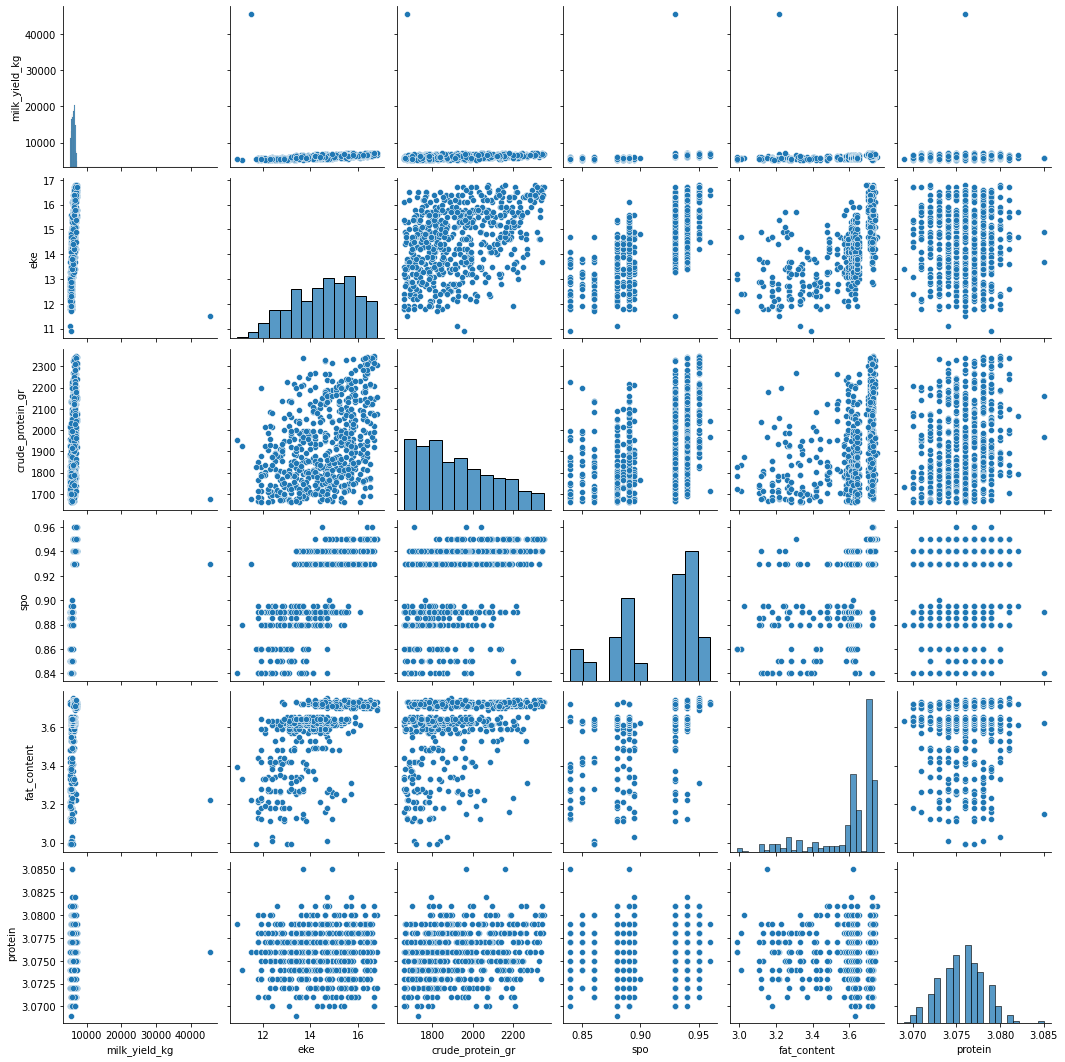

In [36]:
numeric = df_main[['milk_yield_kg', 'eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']].copy()
sns.pairplot(numeric);

In [37]:
def barplot_sign(df, col1, col2):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.barplot(x=df[col1], y=df[col2])
    plt.title(f'Количество коров по {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [38]:
def boxplot_sns(df, col1, col2):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col1], y=df[col2])
    plt.title(f'Отношение {col1} к {col2}')
    plt.xlabel(col1)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel(col2)
    plt.show()

***Порода***

,breed,count
0,вис бик айдиал,373
1,рефлешнсоверинг,256


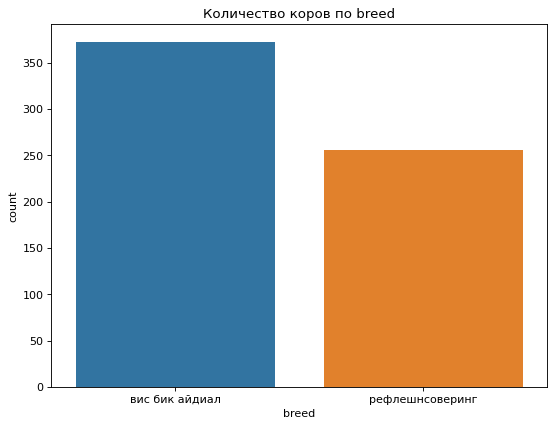

In [39]:
df_breed_hist = df_main.groupby('breed').agg(count =('breed','count')).reset_index()

display(df_breed_hist)

barplot_sign(df_breed_hist, 'breed', 'count')

Из полученного графика видно, что `вис бик айдиал` составляет 373, а `рефлешнсоверинг` — 256. У фермера на данный момент преобладает порода `вис бик айдиал`. Присутствует дисбаланс класса.

***Порода папы быка***

,daddy_breed,count
0,айдиал,318
1,соверин,311


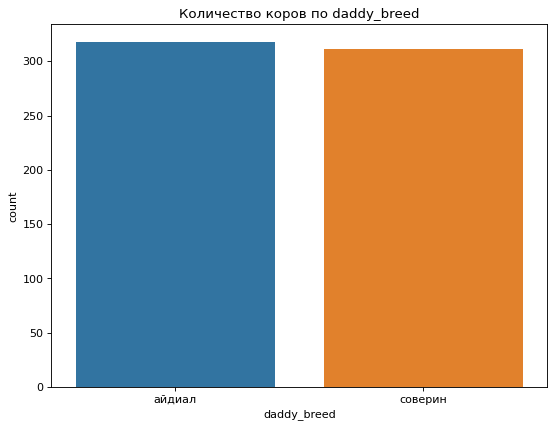

In [40]:
df_group_daddy = df_main.groupby('daddy_breed').agg(count = ('daddy_breed', 'count')).reset_index()

display(df_group_daddy)

barplot_sign(df_group_daddy, 'daddy_breed', 'count')

График «Количество коров по породам папы быка» показал, что класс `айдиал` и `соверин` находятся примерно в равном количестве. Группировка также показала, что `айдиал` — 318, а `соверин` — 311. Дизбаланса классов не наблюдается.

***Возраст***

,age,count
0,более_2_лет,519
1,менее_2_лет,110


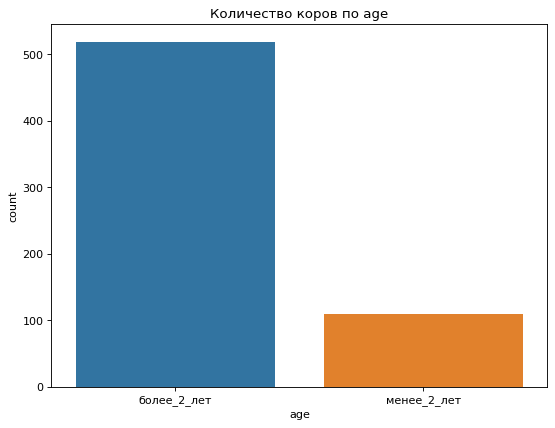

In [41]:
df_group_age = df_main.groupby('age').agg(count = ('age', 'count')).reset_index()

display(df_group_age)
    
barplot_sign(df_group_age, 'age', 'count')

График показывает, что коровы старше 2 лет преобладают на ферме. Это может сказаться на качестве молока.

In [42]:
def hist_quantitative(df, col):
    plt.figure(figsize=(8, 6), dpi = 80)
    sns.histplot(data = df, x = col, bins = 10, kde = True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.show()

***ЭКЕ (Энергетическая кормовая единица)***

In [43]:
df_main['eke'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: eke, dtype: float64

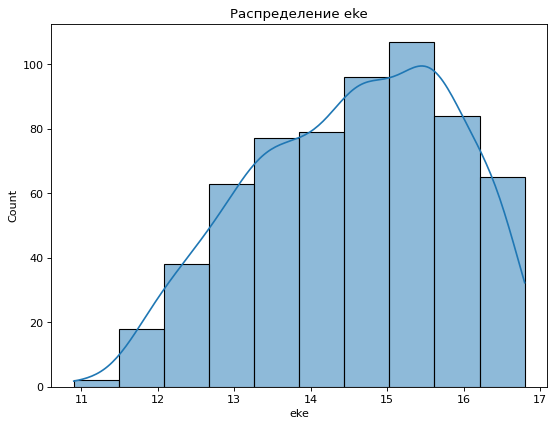

In [44]:
hist_quantitative(df_main, 'eke')

По статистическим методам из `describe` нам становится понятно, что `eke` имеет максимальное значение в 16.8 единиц, а минимальное - 10.9 единиц. Среднее, так же как и на графике - это 14.7 единиц. Судя по форме, данные распределенны ассиметрично c уклоном влево. Это может говорить о том, что в появля

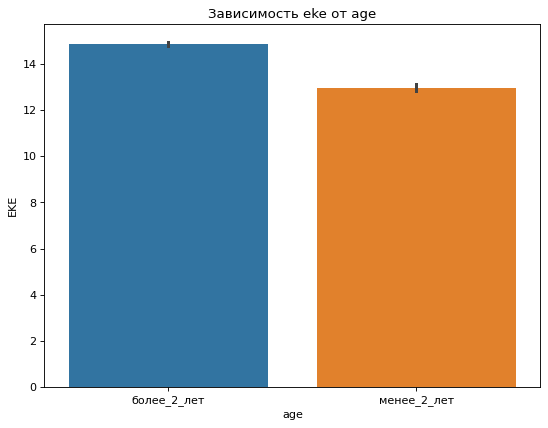

In [45]:
plt.figure(figsize = (8, 6), dpi = 80)
sns.barplot(data=df_main, x='age', y='eke')  # Заменил на barplot. Стало понятнее)))
plt.title('Зависимость eke от age')
plt.xlabel('age')
plt.ylabel('EKE')
plt.show()

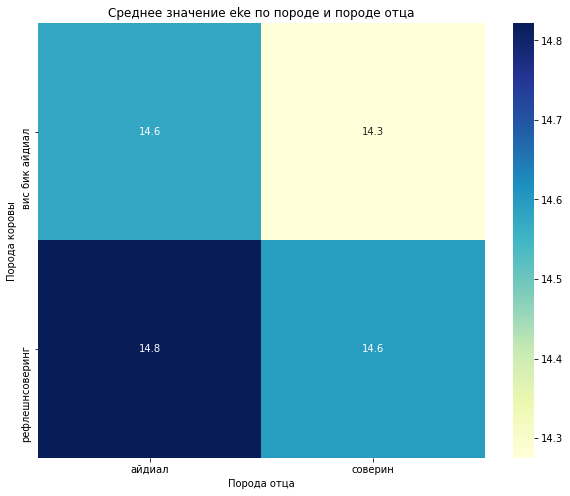

In [46]:
plt.figure(figsize=(10, 8))
pivot_table = df_main.pivot_table(values='eke', index='breed', columns='daddy_breed', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Среднее значение eke по породе и породе отца")
plt.xlabel("Порода отца")
plt.ylabel("Порода коровы")
plt.show()


***По последним двум графикам можно сделать следующие выводы:***
- Scatterplot показал, что энергетическая кормовая единица больше у коров, которых возраст больше 2-х лет. Противоположное можно сказать про коров, возраст которых меньше 2-х лет.

- Heatmap же показал распределение энергетической единицы корма среди пород коров. В качестве анализа были рассмотрены все 4 класса. Породы коров, которые есть у фермера, и породы коровы отца. График показал, что в среднем, порода `Айдиал` и `Рефлешнсоверинг` получают больше единиц корма. 

***Сырой протеин, г***

In [47]:
df_main['crude_protein_gr'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: crude_protein_gr, dtype: float64

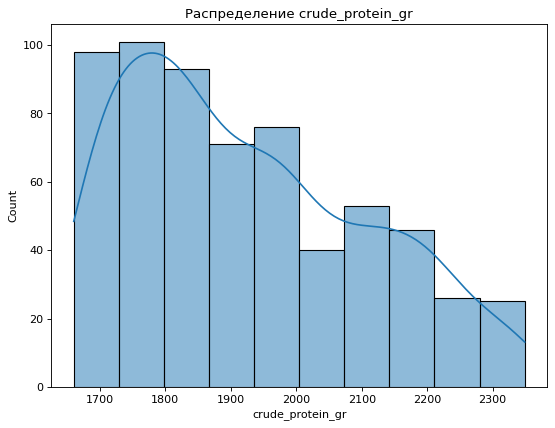

In [48]:
hist_quantitative(df_main, 'crude_protein_gr')

По статистическим методам из `describe` нам становится понятно, что `crude_protein_gr` имеет максимальное значение в 2349 гр, а минимальное - 1660 гр. Среднее, так же как и на графике - это 1923 гр. Судя по форме, данные распределенны ассиметрично c уклоном вправо. При таком распределении среднее значение больше медианы.

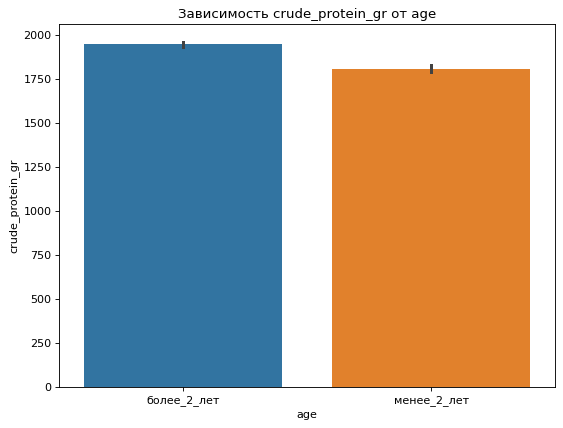

In [49]:
plt.figure(figsize = (8, 6), dpi = 80)
sns.barplot(data=df_main, x='age', y='crude_protein_gr') # Заменил на barplot. Стало понятнее)))
plt.title('Зависимость crude_protein_gr от age')
plt.xlabel('age')
plt.ylabel('crude_protein_gr')
plt.show()

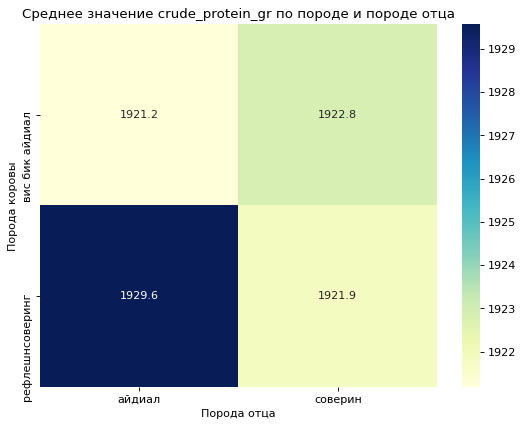

In [50]:
plt.figure(figsize = (8, 6), dpi = 80)
pivot_table = df_main.pivot_table(values='crude_protein_gr', index='breed', columns='daddy_breed', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Среднее значение crude_protein_gr по породе и породе отца")
plt.xlabel("Порода отца")
plt.ylabel("Порода коровы")
plt.show()

***По последним двум графикам можно сделать следующие выводы:***
- Можно заметить, что содержание сырого протеина в корме для коров возрастом более 2-х лет распределен равномерно, а для коров младше 2-х лет пик содержания сырого протеина находится в районе 2050 гр. Это может быть связано еще с небольшой массой молодых коров и поэтому для их суточной нормы кормы этот показатель меньше и подстраивается индивидуально.

- Heatmap опять же показал, что порода `Айдиал` и `Рефлешнсоверинг` получают больше сырого протеина в корм. Возможно это связано с особенностью породы. 

***СПО (Сахаро-протеиновое соотношение)***

In [51]:
df_main['spo'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64

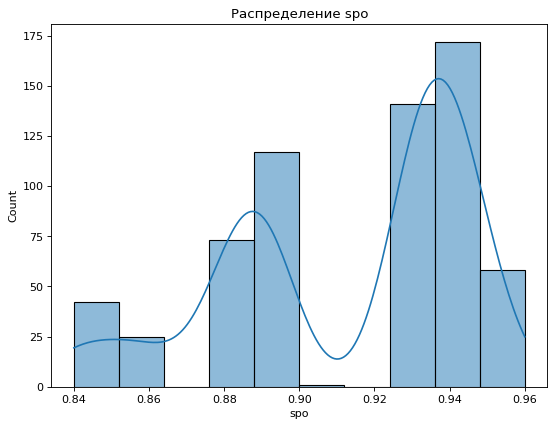

In [52]:
hist_quantitative(df_main, 'spo')

Гистограмма показывает распределение значений `spo`. Видно, что `spo` имеет несколько пиков, что указывает на мультимодальное распределение. Это может означать, что значения `spo` различаются в зависимости от каких-то характеристик коров или условий, в которых они находятся. Наибольшая часть значений `spo` находится в диапазоне от 0.92 до 0.94, что подтверждает высокую концентрацию данных в этом диапазоне.

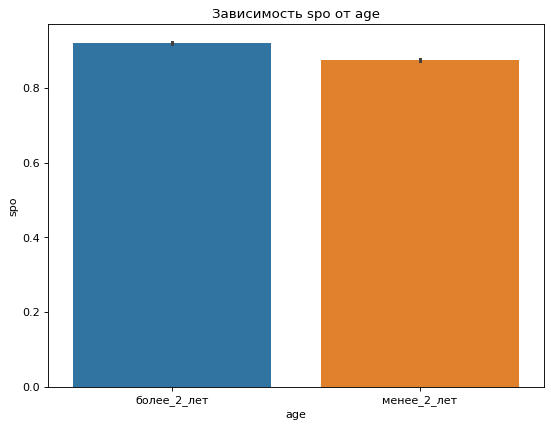

In [53]:
plt.figure(figsize=(8,6), dpi=80)
sns.barplot(data=df_main, x='age', y='spo')
plt.title('Зависимость spo от age')
plt.xlabel('age')
plt.ylabel('spo')
plt.show()

Судя по распределению, значения `spo` для коров старше и младше 2 лет выглядят довольно похожими, и нет явной зависимости между возрастом и `spo`. Значения для обоих возрастных групп колеблются в одном и том же диапазоне (от 0.84 до 0.96), что указывает на то, что возраст, возможно, не оказывает значительного влияния на spo.

***Тип пастбища***

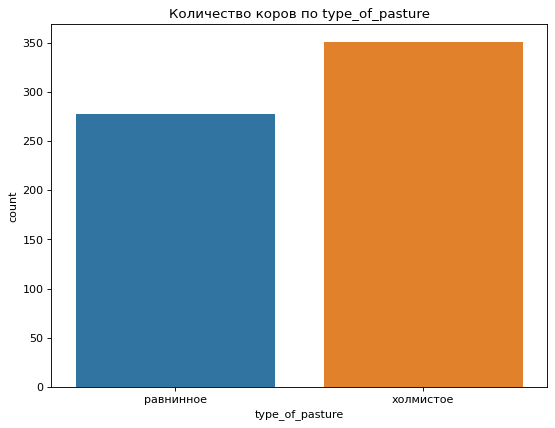

In [54]:
df_type_of_pasture_group = df_main.groupby('type_of_pasture').agg(count = ('type_of_pasture', 'count')).reset_index()
barplot_sign(df_type_of_pasture_group, 'type_of_pasture', 'count')

Диаграмма демонстрирует, что на ферме больше коров находится в холмистой местности.

***Удой, кг***

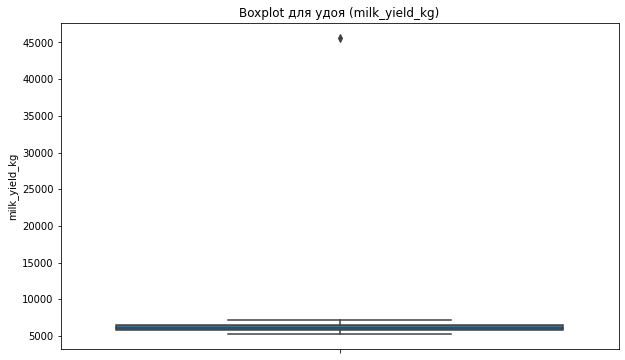

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_main, y='milk_yield_kg')
plt.title('Boxplot для удоя (milk_yield_kg)')
plt.show()

In [56]:
outlier_index = df_main[df_main['milk_yield_kg'] > 30000].index
df_main_cleaned = df_main.drop(outlier_index)

In [57]:
df_group_milk_yield_kg = df_main_cleaned.groupby(['type_of_pasture']).agg(summ = ('milk_yield_kg', 'sum')).reset_index()
df_group_milk_yield_kg

,type_of_pasture,summ
0,равнинное,1683648
1,холмистое,2163460


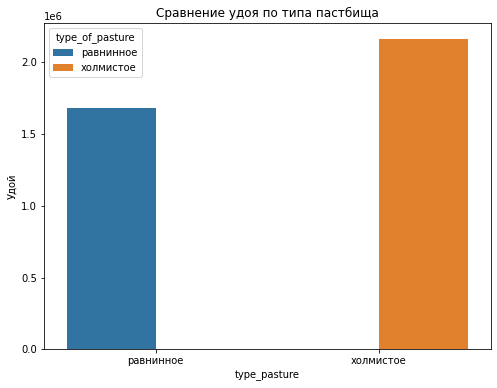

In [58]:
plt.figure(figsize = (8,6))
sns.barplot(data=df_group_milk_yield_kg, x='type_of_pasture', y='summ',  hue='type_of_pasture')
plt.title('Сравнение удоя по типа пастбища')
plt.xlabel('type_pasture')
plt.ylabel('Удой')
plt.show()

***Жирность,%***

In [59]:
df_main_cleaned['fat_content'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

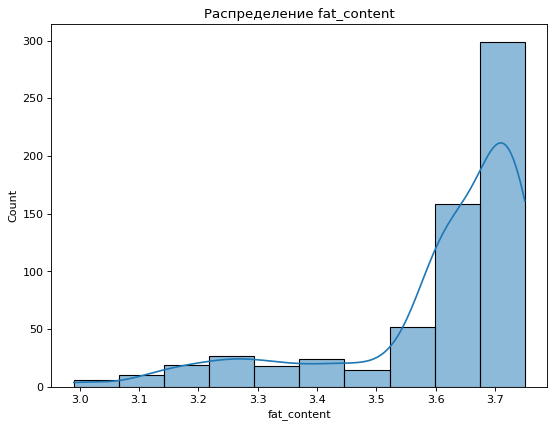

In [60]:
hist_quantitative(df_main_cleaned, 'fat_content')

In [61]:
df_fat_breed = df_main_cleaned.groupby(['breed']).agg(maximum = ('fat_content', 'max'), minimum = ('fat_content', 'min'))
df_fat_breed

,maximum,minimum
breed,,
вис бик айдиал,3.75,2.99
рефлешнсоверинг,3.74,2.99


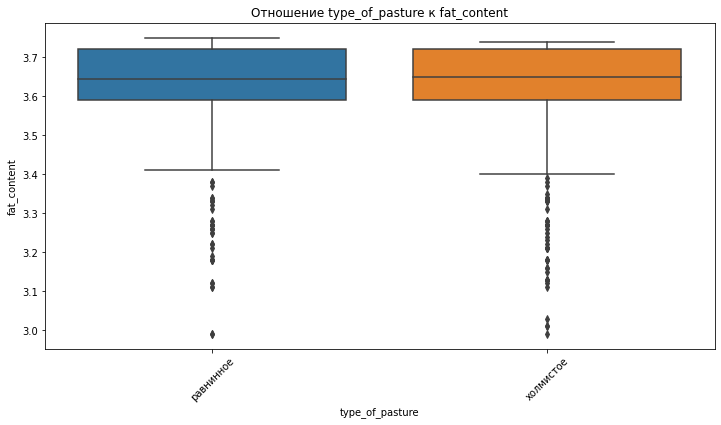

In [62]:
boxplot_sns(df_main_cleaned, 'type_of_pasture', 'fat_content')

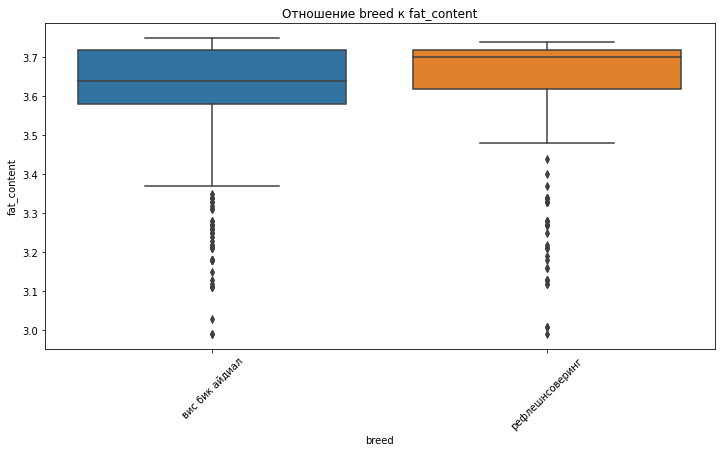

In [63]:
boxplot_sns(df_main_cleaned, 'breed', 'fat_content')

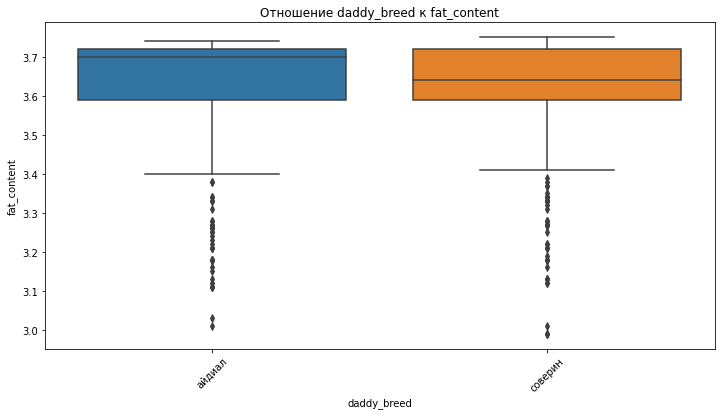

In [64]:
boxplot_sns(df_main_cleaned, 'daddy_breed', 'fat_content')

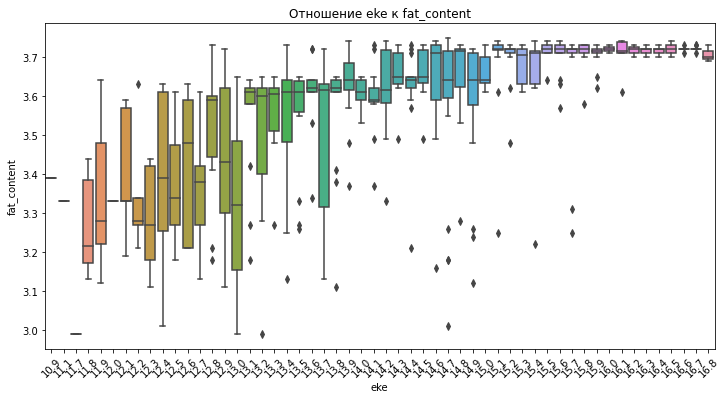

In [65]:
boxplot_sns(df_main_cleaned, 'eke', 'fat_content')

***1. Гистограмма:***

- На гистограмме видно, что большинство значений сосредоточено в диапазоне 3.6–3.7, что соответствует 75-му перцентилю. Основной пик указывает на то, что большая часть выборки имеет жирность в районе 3.6%–3.7%, что можно считать типичным значением для выборки.


***2. Влияние type_of_pasture на fat_content:***


- Равнинное и Холмистое пастбища имеют схожее распределение жирности, с медианой около 3.65–3.7.
- Оба типа пастбища имеют выбросы в диапазоне от 3.4 и ниже, причем выбросов достаточно много, что может указывать на естественную вариативность жирности в популяции.
- Различий по `жирности` в зависимости от типа `пастбища` не наблюдается.
     
     
***3. Влияние breed на fat_content:***


- Породы `вис бик айдиал` и `рефлешнсоверинг` также показывают очень близкое распределение жирности.
- Медианные значения для обеих пород находятся на уровне 3.65–3.7, и у обеих пород присутствуют выбросы в диапазоне от 3.4 и ниже.
- Здесь также не видно существенных различий в `жирности` в зависимости от `породы`.
    
    
***4. Влияние daddy_breed на fat_content:***


- Медианы и межквартильные размахи близки друг к другу. Однако присутствуют значительные выбросы ниже 3.4 для большинства пород, что опять же может говорить об отсутствии сильной зависимости между `daddy_breed` и `fat_content`.


***5. Зависимость fat_content от eke:***


- График демонстрирует явную тенденцию: при увеличении `eke` медианное значение жирности также увеличивается. Этот результат может указывать на положительную связь между энергетической кормовой единицей и жирностью молока, что является потенциально полезной зависимостью для анализа.

***Белок,%***

In [66]:
df_main_cleaned['protein'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

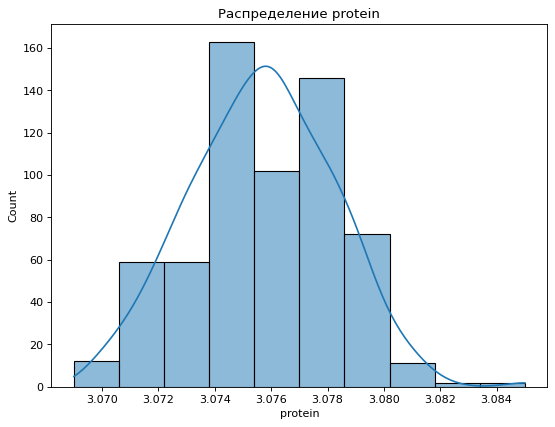

In [67]:
hist_quantitative(df_main_cleaned, 'protein')

In [68]:
df_protein_breed = df_main_cleaned.groupby(['breed']).agg(maximum = ('protein', 'max'), minimum = ('protein', 'min'))
df_protein_breed

,maximum,minimum
breed,,
вис бик айдиал,3.085,3.069
рефлешнсоверинг,3.082,3.070


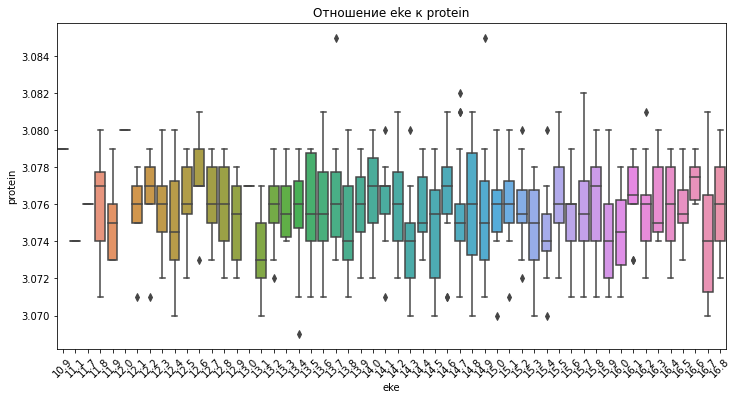

In [69]:
boxplot_sns(df_main_cleaned, 'eke', 'protein')

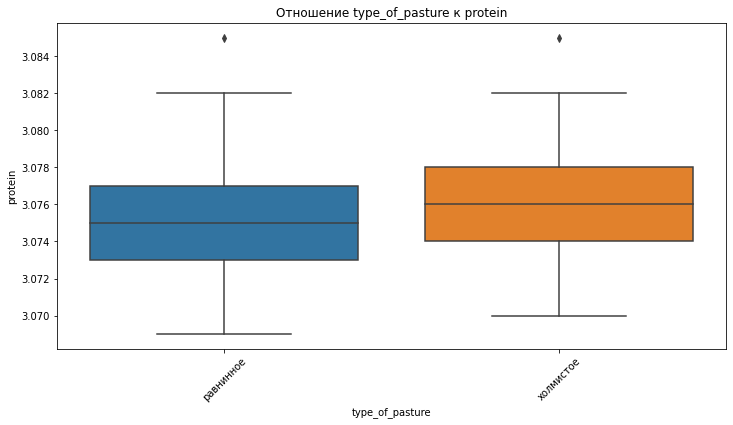

In [70]:
boxplot_sns(df_main_cleaned, 'type_of_pasture', 'protein')

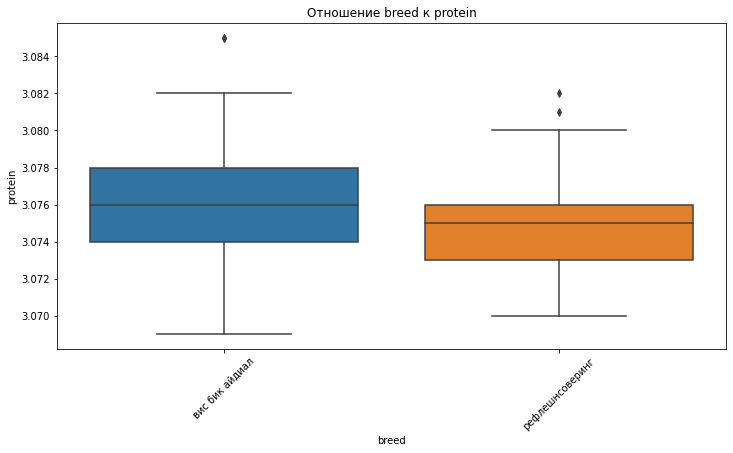

In [71]:
boxplot_sns(df_main_cleaned, 'breed', 'protein')

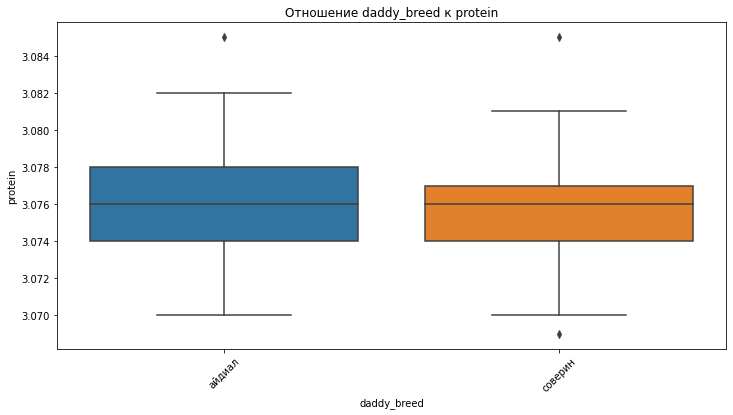

In [72]:
boxplot_sns(df_main_cleaned, 'daddy_breed', 'protein')

***1. Гистограмма:***

Гистограмма показывает, что значения белка распределены очень узко, в диапазоне от 3.07 до 3.08, с пиком в районе 3.074.
Это указывает на высокую стабильность содержания белка и отсутствие значительных отклонений.


***2. Зависимость protein от eke:***

Зависимость белка от `eke`, демонстрирует, что изменения в `eke` не вносят заметного вклада в изменение белка.
Различие в медианах и межквартильном размахе между разными уровнями `eke` незначительно, что может указывать на слабую или отсутствующую зависимость между этими переменными.


***3. Влияние type_of_pasture на protein:***

Значения белка для `равнинного` и `холмистого` типов пастбища также очень близки друг к другу. На boxplot медианные значения почти совпадают, и диапазон значений белка в обоих случаях схожий.
Таким образом, тип пастбища не оказывает значительного влияния на содержание белка.


***4. Влияние breed на protein:***

Boxplot для разных пород показывает, что породы `вис бик айдиал` и `рефлешнсоверинг` имеют схожие уровни содержания белка, без значительных отличий.
Это указывает на то, что порода также не является существенным фактором, влияющим на содержание белка в данных.


***5. Влияние daddy_breed на protein:***

Породы отца не оказывают значимого влияния на содержание белка. Оба класса породы отца (`айдиал` и `соверин`) имеют схожие медианы и размах значений белка.

***Вкус молока***

In [73]:
df_group_taste_milk = df_main_cleaned.groupby(['type_of_pasture', 'the_taste_of_milk']).agg(count = ('type_of_pasture', 'count')).reset_index()
df_group_taste_milk

,type_of_pasture,the_taste_of_milk,count
0,равнинное,вкусно,136
1,равнинное,не вкусно,142
2,холмистое,вкусно,234
3,холмистое,не вкусно,116


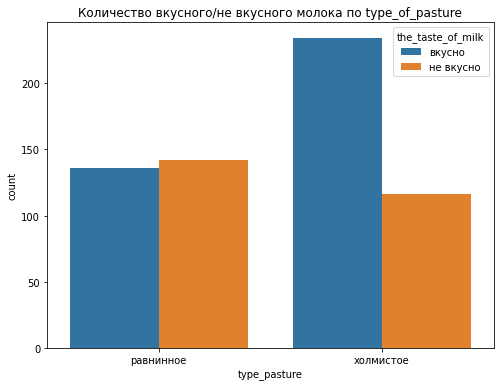

In [74]:
plt.figure(figsize = (8,6))
sns.barplot(data=df_group_taste_milk, x='type_of_pasture', y='count',  hue='the_taste_of_milk')
plt.title('Количество вкусного/не вкусного молока по type_of_pasture')
plt.xlabel('type_pasture')
plt.ylabel('count')
plt.show()

Основываясь на полученных данных, можно заключить, что молоко, полученное от коров, которые паслись на холмах, обладает более насыщенным вкусом. В то же время, молоко от коров, которые паслись на равнинах, имеет менее выраженный вкус, и доля вкусного молока в общем объёме меньше доли не вкусного молока.

### Вывод по исследовательскому анализу данных

### 1. Статистический анализ признаков:

***1. Порода:***
    
   - График показал, что `вис бик айдиал` составляет 373, а `рефлешнсоверинг` — 256. У фермера на данный момент преобладает порода вис бик айдиал. Присутствует дисбаланс класса.
        
***2. Порода папы быка:***
    
   - График «Количество коров по породам папы быка» показал, что класс `айдиал` и `соверин` находятся примерно в равном количестве. Группировка также показала, что `айдиал` — 318, а `соверин` — 311. Дизбаланса классов не наблюдается.
        
***3. Возраст:***
    
   - График показал, что коровы старше 2 лет преобладают на ферме. Это может сказаться на качестве молока.
        
***4. ЭКЕ (Энергетическая кормовая единица:***
    
   - По статистическим методам из `describe` понятно, что `eke` имеет максимальное значение в 16.8 единиц, а минимальное - 10.9 единиц. Среднее, так же как и на графике - это 14.7 единиц. Судя по форме, данные распределенны ассиметрично c уклоном влево. Это может говорить о том, что в появля
   - `Scatterplot` показал, что энергетическая кормовая единица больше у коров, которых возраст больше 2-х лет. Противоположное можно сказать про коров, возраст которых меньше 2-х лет.
   - `Heatmap` же показал распределение энергетической единицы корма среди пород коров. В качестве анализа были рассмотрены все 4 класса. Породы коров, которые есть у фермера, и породы коровы отца. График показал, что в среднем, порода `Айдиал` и `Рефлешнсоверинг` получают больше единиц корма.
        
***5. СПО (Сахаро-протеиновое соотношение:***
    
   - Гистограмма показала распределение значений `spo`. Видно, что `spo` имеет несколько пиков, что указывает на `мультимодальное распределение`. Это может означать, что значения `spo` различаются в зависимости от каких-то характеристик коров или условий, в которых они находятся. Наибольшая часть значений spo находится в диапазоне от 0.92 до 0.94, что подтверждает высокую концентрацию данных в этом диапазоне.
   - Значения `spo` для коров `старше` и `младше 2 лет` выглядят довольно похожими, и нет явной зависимости между возрастом и `spo`. Значения для обоих возрастных групп колеблются в одном и том же диапазоне (от 0.84 до 0.96), что указывает на то, что возраст, не оказывает значительного влияния на `spo`.
        
***6. Тип пастбища:***
    
   - Диаграмма показала, что на ферме больше коров находится в холмистой местности.
        
***7. Удой, кг :***
    
   - Было выявлено, что тип пастбища влияет на удой коров. Коровы, которые пасутся в холмистой местности приносят больше молока, чем те, которые находятся в равнине.

***8. Жирность, %:***
    
   - Гистограмма показала, что большинство значений сосредоточено в диапазоне 3.6–3.7, что соответствует 75-му перцентилю. Основной пик указывает на то, что большая часть выборки имеет жирность в районе 3.6%–3.7%, что можно считать типичным значением для выборки.
   - Равнинное и Холмистое пастбища имеют схожее распределение жирности, с медианой около 3.65–3.7. Оба типа пастбища имеют выбросы в диапазоне от 3.4 и ниже, причем выбросов достаточно много, что может указывать на естественную вариативность жирности в популяции. Различий по жирности в зависимости от типа пастбища не наблюдается.
   - Породы `вис бик айдиал` и `рефлешнсоверинг` также показывают очень близкое распределение жирности. Медианные значения для обеих пород находятся на уровне 3.65–3.7, и у обеих пород присутствуют выбросы в диапазоне от 3.4 и ниже. Здесь также не видно существенных различий в жирности в зависимости от породы.
   - Медианы и межквартильные размахи близки друг к другу. Однако присутствуют значительные выбросы ниже 3.4 для большинства пород, что опять же может говорить об отсутствии сильной зависимости между `daddy_breed` и `fat_content`.
   - График демонстрирует явную тенденцию: при увеличении `eke` медианное значение жирности также увеличивается. Этот результат может указывать на положительную связь между энергетической кормовой единицей и жирностью молока, что является потенциально полезной зависимостью для анализа.
        
***9. Белок, %:***
    
   - Гистограмма показала, что значения белка распределены очень узко, в диапазоне от 3.07 до 3.08, с пиком в районе 3.074. Это указывает на высокую стабильность содержания белка и отсутствие значительных отклонений.
   - Зависимость белка от `eke`, демонстрирует, что изменения в eke не вносят заметного вклада в изменение белка. Различие в медианах и межквартильном размахе между разными уровнями `eke` незначительно, что может указывать на слабую или отсутствующую зависимость между этими переменными.
   - Значения белка для равнинного и холмистого типов пастбища также очень близки друг к другу. На boxplot медианные значения почти совпадают, и диапазон значений белка в обоих случаях схожий. Таким образом, тип пастбища не оказывает значительного влияния на содержание белка.
   - Boxplot для разных пород показывает, что породы вис бик айдиал и рефлешнсоверинг имеют схожие уровни содержания белка, без значительных отличий. Это указывает на то, что порода также не является существенным фактором, влияющим на содержание белка в данных.
   - Породы отца не оказывают значимого влияния на содержание белка. Оба класса породы отца (айдиал и соверин) имеют схожие медианы и размах значений белка.
        
***10. Вкус молока:***
    
   - Основываясь на полученных данных, можно заключить, что молоко, полученное от коров, которые паслись на холмах, обладает более насыщенным вкусом. В то же время, молоко от коров, которые паслись на равнинах, имеет менее выраженный вкус, и доля вкусного молока в общем объёме меньше доли не вкусного молока.
        
### 2. Выводы о данных:


***А. Анализ выбросов:***
   - Для переменной `fat_content (Жирность, %)` присутствует значительное количество низких выбросов, особенно для значений ниже 3.4. Это наблюдается как для общего распределения, так и для групп по типу пастбища, породе и породе отца.
   - Для переменной `protein (Белок, %)` выбросы менее выражены, но небольшое количество значений также выходит за пределы основного диапазона, особенно ниже 3.07 и выше 3.08.
   
***Б. Необычное распределение количественных признаков:***
   
   - `Распределение protein`: Белок распределен очень узко, и большинство значений находятся в диапазоне 3.07–3.08, что указывает на высокую стабильность этого показателя. Такое распределение может свидетельствовать о стандартизации состава молока для этих коров или о его ограниченной вариативности.
   - `Распределение fat_content`: Жирность имеет более широкий диапазон значений, но распределение асимметрично с небольшим `хвостом` на низких значениях. Пик находится на уровне 3.6–3.7, что является основным диапазоном жирности, но выбросы ниже 3.4 могут указывать на необычные случаи.
   
***В. Возможные улучшение данных:***

   - Стандартизация данных.
   - Нормализация данных.
   - Собрать/попросить у заказчика дополнительно данные.

## Корреляционный анализ
1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
2. Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
3. Сделайте выводы о взаимосвязи признаков.
   - Какой тип взаимосвязи между целевым и входными признаками?
   - Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
   - Наблюдается ли мультиколлинеарность между входными признаками?

In [75]:
df_main_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 628 non-null    int64  
 1   milk_yield_kg      628 non-null    int64  
 2   eke                628 non-null    float64
 3   crude_protein_gr   628 non-null    int64  
 4   spo                628 non-null    float64
 5   breed              628 non-null    object 
 6   type_of_pasture    628 non-null    object 
 7   daddy_breed        628 non-null    object 
 8   fat_content        628 non-null    float64
 9   protein            628 non-null    float64
 10  the_taste_of_milk  628 non-null    object 
 11  age                628 non-null    object 
 12  name_dad           628 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 84.9+ KB


In [76]:
"""def detect_anomaly(sing):
    mid = numeric[sing].mean()
    sigma = numeric[sing].std()
    return numeric[(numeric[sing] < mid - 3 * sigma) | (numeric[sing] > mid + 3 * sigma)].index
"""

'def detect_anomaly(sing):\n    mid = numeric[sing].mean()\n    sigma = numeric[sing].std()\n    return numeric[(numeric[sing] < mid - 3 * sigma) | (numeric[sing] > mid + 3 * sigma)].index\n'

In [77]:
"""numeric = df_main[['milk_yield_kg', 'eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']].copy()
sns.pairplot(numeric);"""

"numeric = df_main[['milk_yield_kg', 'eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']].copy()\nsns.pairplot(numeric);"

In [78]:
"""outliers = set()

for column in numeric.columns:
    outliers.update(detect_anomaly(column))

print(f"Количество выбросов: {len(outliers)}")
print("Индексы выбросов:", outliers)"""

'outliers = set()\n\nfor column in numeric.columns:\n    outliers.update(detect_anomaly(column))\n\nprint(f"Количество выбросов: {len(outliers)}")\nprint("Индексы выбросов:", outliers)'

In [79]:
"""df_outliers = df_main.loc[list(outliers)]
display(df_outliers)"""

'df_outliers = df_main.loc[list(outliers)]\ndisplay(df_outliers)'

In [80]:
"""df_main_cleaned = df_main.drop(outliers)"""

'df_main_cleaned = df_main.drop(outliers)'

Построим матрицу корреляций Спирмена для числовых признаков.

In [81]:
df_main_cleaned[['milk_yield_kg', 'eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']].corr(method='spearman')

,milk_yield_kg,eke,crude_protein_gr,spo,fat_content,protein
milk_yield_kg,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
eke,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
crude_protein_gr,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
spo,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
fat_content,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
protein,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


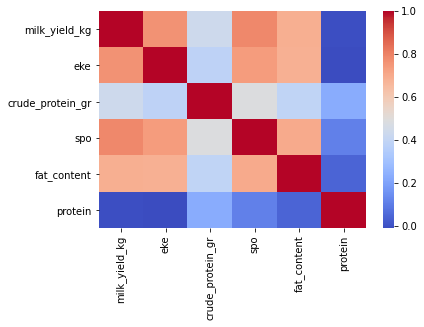

In [82]:
sns.heatmap(df_main_cleaned[['milk_yield_kg', 'eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']].corr(method='spearman'), cmap= 'coolwarm');

***Наибольшая корреляция наблюдается*** у `eke` & `milk_yield_kg`, `eke` & `spo`, `spo` & `milk_yield_kg`. 

***Слабая корреляция*** у `milk_yield_kg` & `protein`, `eke` & `protein`, `spo` & `protein`, `fat_content` & `protein`. 

In [83]:
def scatter_plot_numeric(df, col1, col2, hue):
    plt.figure(figsize = (10,12))
    sns.scatterplot(data = df, x = df[col1], y = df[col2], hue = hue, legend="full")
    plt.title(f'{col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

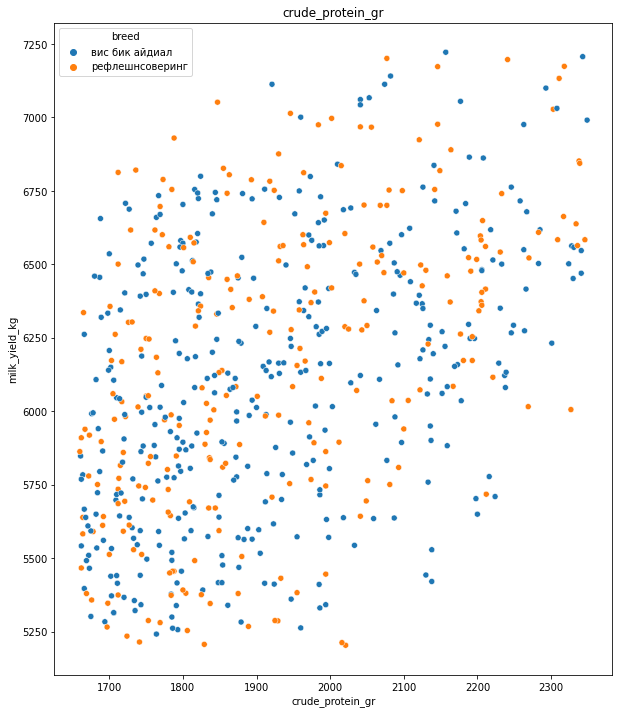

In [84]:
scatter_plot_numeric(df_main_cleaned, 'crude_protein_gr', 'milk_yield_kg', 'breed')

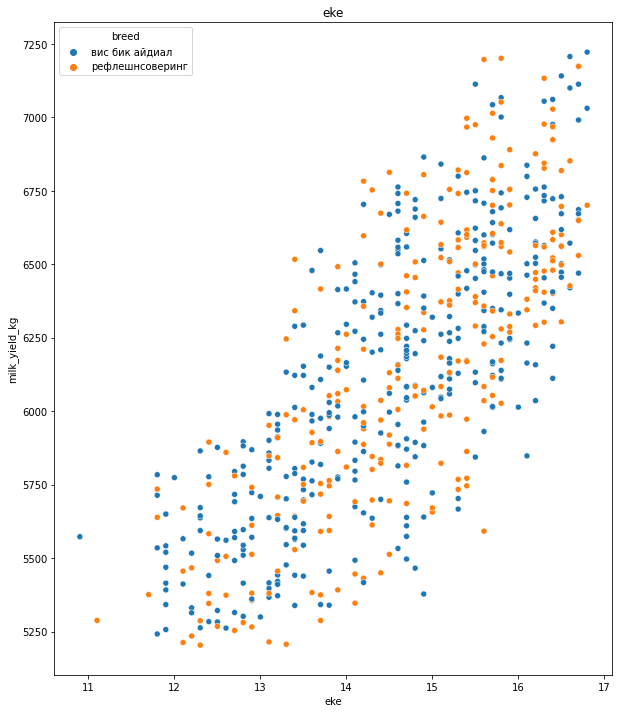

In [85]:
scatter_plot_numeric(df_main_cleaned, 'eke', 'milk_yield_kg', 'breed')

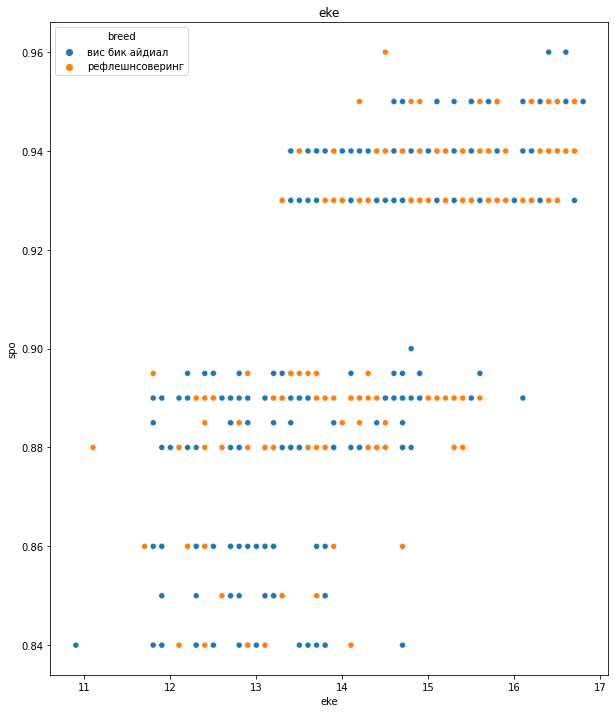

In [86]:
scatter_plot_numeric(df_main_cleaned, 'eke', 'spo', 'breed')

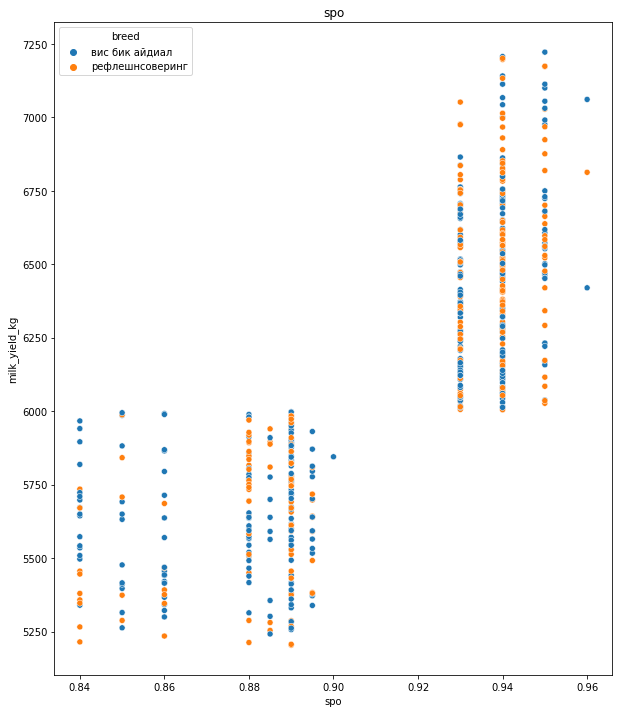

In [87]:
scatter_plot_numeric(df_main_cleaned, 'spo', 'milk_yield_kg', 'breed')

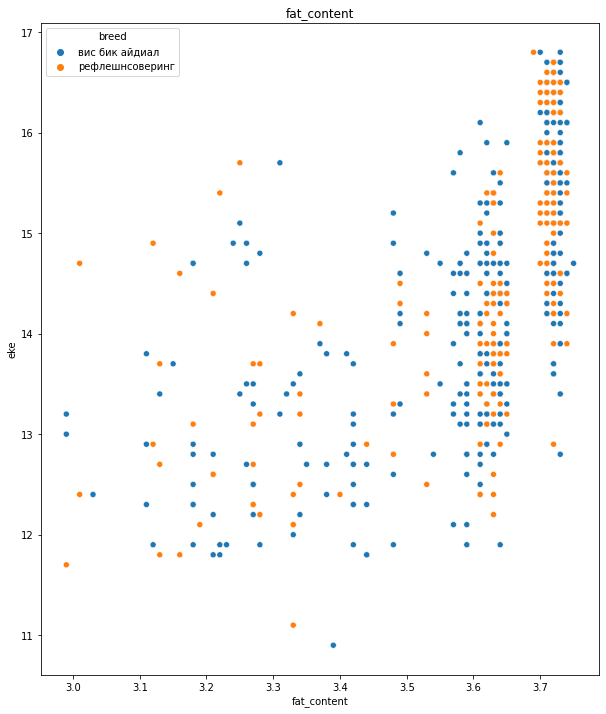

In [88]:
scatter_plot_numeric(df_main_cleaned, 'fat_content', 'eke', 'breed') 

In [89]:
factor = ['eke', 'crude_protein_gr', 'spo', 'fat_content', 'protein']
targ = 'milk_yield_kg'
cat = ['breed', 'type_of_pasture']

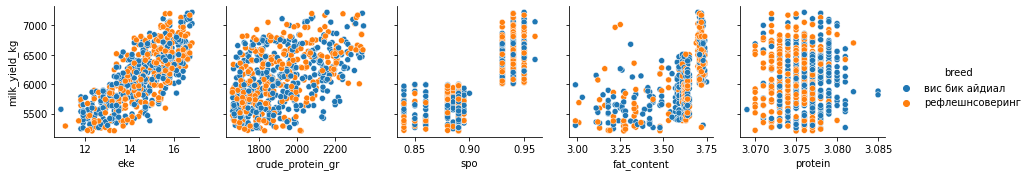

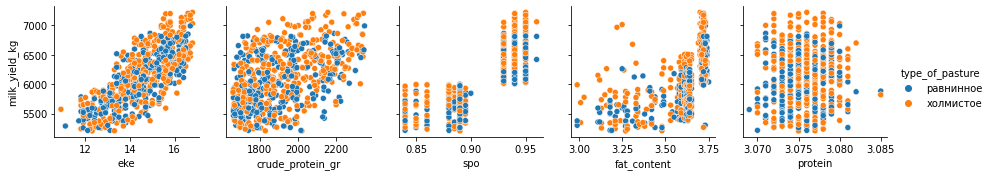

In [90]:
for category in cat:
    g = sns.PairGrid(df_main_cleaned, hue=category, x_vars=factor, y_vars=targ)
    g.map(sns.scatterplot)
    g.add_legend()
    plt.show()

- `eke` и `milk_yield_kg` — наблюдается сильная положительная корреляция, особенно для обоих типов пород. Это указывает на значимую линейную связь, где рост `eke` сопровождается увеличением `milk_yield_kg`.

- `crude_protein_gr` и `milk_yield_kg` — выраженной линейной зависимости здесь нет.

- `spo` и `milk_yield_kg` — дискретная взаимосвязь, точки сосредоточены на нескольких уровнях `spo`, что показывает отсутствие линейной зависимости.

- `fat_content` и `protein` — данные распределены по группам в зависимости от породы и типа пастбища. Эти признаки могут оказывать влияние на `milk_yield_kg`, но не линейным образом.

#### Вывод по корреляционному анализу:

***1. Изучили взаимосвязь между признаками при помощи метода Спирмена:***
- `Наибольшая корреляция` наблюдается у `eke` & `milk_yield_kg`, `eke` & `spo`, `spo` & `milk_yield_kg`.
- `Слабая корреляция` у `milk_yield_kg` & `protein`, `eke` & `protein`, `spo` & `protein`, `fat_content` & `protein`.

***2. Построили диаграмму рассеяния для признака milk_yield_kg и всех количественных признаков с учётом значения категориальных признаков:***

- Слабая линейная связь между `crude_protein_gr` и `milk_yield_kg`.
- Есть линейная связь между `eke` и `milk_yield_kg`.
- Дискретная связь между `eke` и `spo`, `spo` и `milk_yield_kg`.
- Отсутсвует линейная связь между `fat_content` и `eke`.



In [91]:
numeric_with_const = sm.add_constant(numeric)

In [92]:
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_with_const.values, i) for i in range(numeric_with_const.shape[1])]

In [93]:
vif_data

,feature,VIF
0,const,1.568894e+06
1,milk_yield_kg,1.083339e+00
2,eke,2.562592e+00
3,crude_protein_gr,1.344581e+00
4,spo,2.743570e+00
5,fat_content,1.888326e+00
6,protein,1.079733e+00


Значения VIF > 10. Это значит, каждый признак достаточно независим и не является линейной комбинацией других признаков. Оособенно большой показатель VIF у `spo`.

## Обучение модели линейной регрессии

In [110]:
def metrics_MSE_MAE_RMSE_R2(y_test, y_pred):
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=True)
    return print(f'MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}')

In [111]:
RANDOM_STATE = 42

In [112]:
X = df_main_cleaned.drop(columns=['milk_yield_kg', 'fat_content', 'crude_protein_gr', 'protein', 'name_dad', 'the_taste_of_milk'])
y = df_main_cleaned['milk_yield_kg']

In [113]:
numeric_columns = ['eke', 'spo']
cat_col_names = ['type_of_pasture', 'age', 'daddy_breed', 'breed']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns]) 
X_test_scaled = scaler.fit_transform(X_test[numeric_columns])

In [116]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = numeric_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = numeric_columns, index=X_test.index)

In [117]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [118]:
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.fit_transform(X_test[cat_col_names])

In [119]:
encoder_col_names = encoder.get_feature_names(cat_col_names)

In [120]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)

In [121]:
X_train_all = pd.concat([X_train_scaled_df, X_train_ohe_df], axis = 1)
X_test_all = pd.concat([X_test_scaled_df, X_test_ohe_df], axis = 1)

In [122]:
model_lr = LinearRegression()
model_lr.fit(X_train_all, y_train)

LinearRegression()

In [123]:
y_pred = model_lr.predict(X_test_all)

In [124]:
metrics_MSE_MAE_RMSE_R2(y_test, y_pred)

MSE: 44300.79992890093
MAE: 169.18039676922913
RMSE: 44300.79992890093


In [125]:
r2 = r2_score(y_test, y_pred)

In [126]:
print(f'R2 Linear Regression: {r2}')

R2 Linear Regression: 0.7823751251234974


In [127]:
residuals = y_test - y_pred

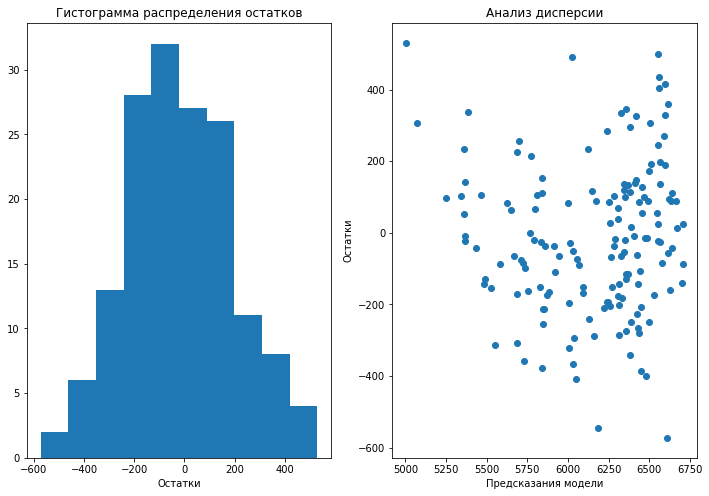

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Коэффициент детерминации (r2_score) = 0.782. Это значит, что модель хорошо работает с тестовым набором данных. Подобранные категориальные и количественные переменныепоказали хороший результат для первого обучения модели.

Признаки `eke`, `spo`, `protein`, `type_of_pasture`, `age`, `daddy_breed`, `breed` выбраны потому что в ходе исследовательского и корреляционного анализа были получены диаграммы рессеяния, которые показали сильную связь некоторых признаков друг с другом

***Гистограмма распределения остатков*** имеет равномерное распределение. Все значения распределны вокруг 0, значит модель неплохо предсказывает значения целевой переменной.  Остатки распределены относительно симметрично вокруг нуля, что является положительным признаком. 

***Анализ дисперсии*** показывает, что нет точной структуры. Разброс возле нуля может говорить о том, что модель не имеет частой ошибки.
Модель нужно улучшать для получения лучших показателей. Что можно попробовать:
1. Добавить новые признаки. 
2. Подобрать гиперпараметры.
3. Обучить модель другого типа.

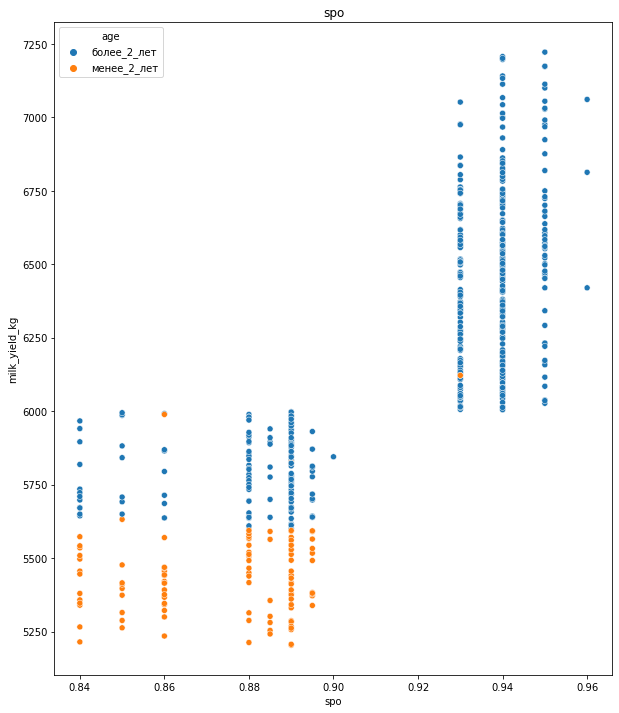

In [129]:
scatter_plot_numeric(df_main_cleaned, 'spo', 'milk_yield_kg', 'age')

In [130]:
spo_threshold = 0.915
df_main_cleaned['spo_category'] = (df_main_cleaned['spo'] > spo_threshold).astype(int)

In [131]:
df_main_cleaned['eke_squared'] = df_main_cleaned['eke'] ** 2

***На графике видно, что:***

- Категория spo_category=0 (с spo ниже 0.91) включает наблюдения с относительно меньшими значениями milk_yield_kg.
- Категория spo_category=1 (с spo выше 0.91) включает более широкий диапазон значений milk_yield_kg.

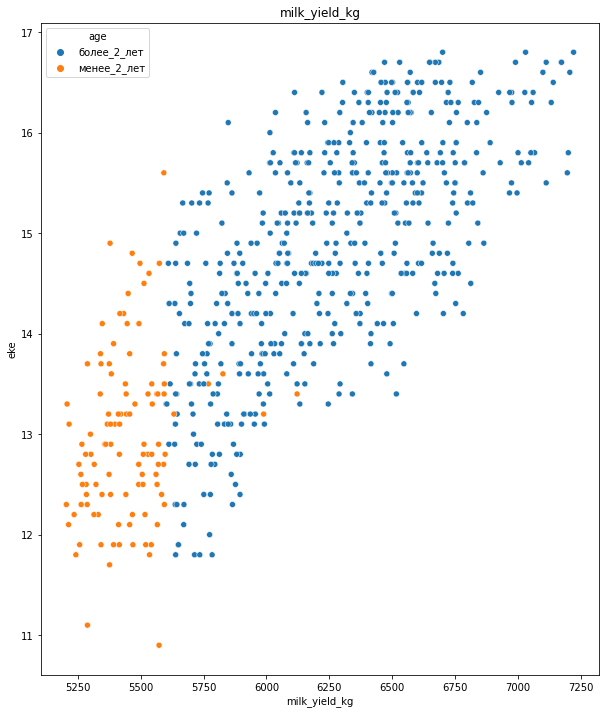

In [132]:
scatter_plot_numeric(df_main_cleaned, 'milk_yield_kg', 'eke', 'age')

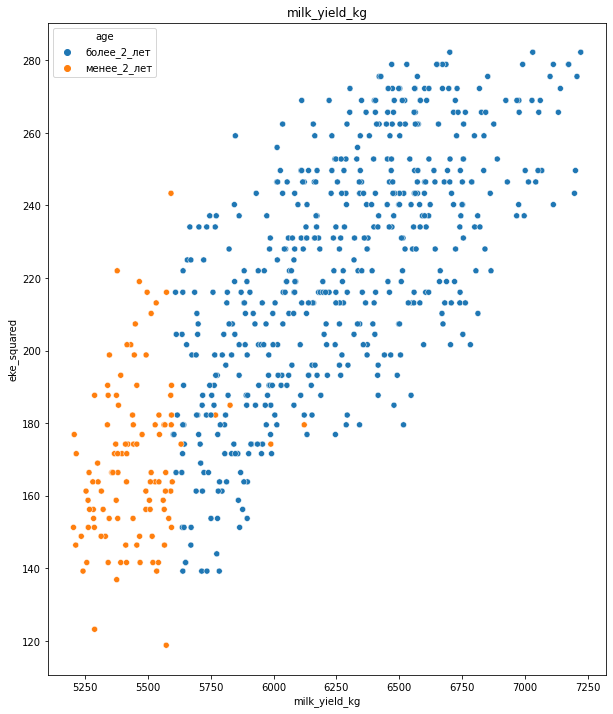

In [133]:
scatter_plot_numeric(df_main_cleaned, 'milk_yield_kg', 'eke_squared', 'age')

Видно, что распределение данных лучше отображает кластеры по возрасту (age), а также прослеживается нелинейная зависимость между удоем и eke_squared. Это подтверждает, что добавление квадратичного признака (eke_squared) улучшает представление нелинейных связей.

In [134]:
X = df_main_cleaned.drop(columns=['milk_yield_kg', 'fat_content', 'name_dad', 'spo', 'eke', 'crude_protein_gr', 'the_taste_of_milk'])
y = df_main_cleaned['milk_yield_kg']

In [135]:
numeric_columns = ['eke_squared',  'protein']
cat_col_names = ['type_of_pasture', 'breed', 'daddy_breed', 'age', 'spo_category']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [137]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns]) 
X_test_scaled = scaler.fit_transform(X_test[numeric_columns])

In [138]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = numeric_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = numeric_columns, index=X_test.index)

In [139]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [140]:
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.fit_transform(X_test[cat_col_names])

In [141]:
encoder_col_names = encoder.get_feature_names(cat_col_names)

In [142]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)

In [143]:
X_train_all = pd.concat([X_train_scaled_df, X_train_ohe_df], axis = 1)
X_test_all = pd.concat([X_test_scaled_df, X_test_ohe_df], axis = 1)

In [144]:
model_lr = LinearRegression()
model_lr.fit(X_train_all, y_train)

LinearRegression()

In [145]:
y_pred = model_lr.predict(X_test_all)

In [146]:
metrics_MSE_MAE_RMSE_R2(y_test, y_pred)

MSE: 37115.40190742125
MAE: 151.3087584655572
RMSE: 37115.40190742125


In [147]:
r2 = r2_score(y_test, y_pred)

In [148]:
print(f'R2 Linear Regression: {r2}')

R2 Linear Regression: 0.817672937981776


In [149]:
residuals = y_test - y_pred

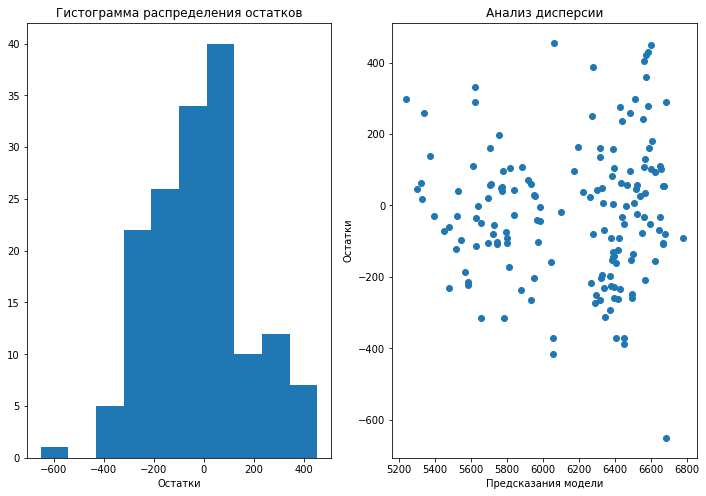

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Коэффициент детерминации (r2_score) = 0.817. Это указывает на то, что использование spo_category в качестве категориального влияет на улучшение модели. Гистограмма показывает смещение, хотя большая часть распределена возле 0. Присутствует разброс остатков - это показывает погрешность.

In [151]:
X = df_main_cleaned.drop(columns=['milk_yield_kg', 'spo', 'eke', 'the_taste_of_milk', 'protein', 'fat_content'])
y = df_main_cleaned['milk_yield_kg']

In [152]:
numeric_columns = ['eke_squared', 'crude_protein_gr']
cat_col_names = ['type_of_pasture', 'breed', 'daddy_breed', 'age', 'spo_category', 'name_dad']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns]) 
X_test_scaled = scaler.fit_transform(X_test[numeric_columns])

In [155]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = numeric_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = numeric_columns, index=X_test.index)

In [156]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [157]:
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.fit_transform(X_test[cat_col_names])

In [158]:
encoder_col_names = encoder.get_feature_names(cat_col_names)

In [159]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)

In [160]:
X_train_all = pd.concat([X_train_scaled_df, X_train_ohe_df], axis = 1)
X_test_all = pd.concat([X_test_scaled_df, X_test_ohe_df], axis = 1)

In [161]:
model_lr = LinearRegression()
model_lr.fit(X_train_all, y_train)

LinearRegression()

In [162]:
y_pred = model_lr.predict(X_test_all)

In [163]:
metrics_MSE_MAE_RMSE_R2(y_test, y_pred)

MSE: 35595.50151032513
MAE: 146.03594810560662
RMSE: 35595.50151032513


In [164]:
r2 = r2_score(y_test, y_pred)

In [165]:
print(f'R2 Linear Regression: {r2}')

R2 Linear Regression: 0.8251393524545089


In [166]:
residuals = y_test - y_pred

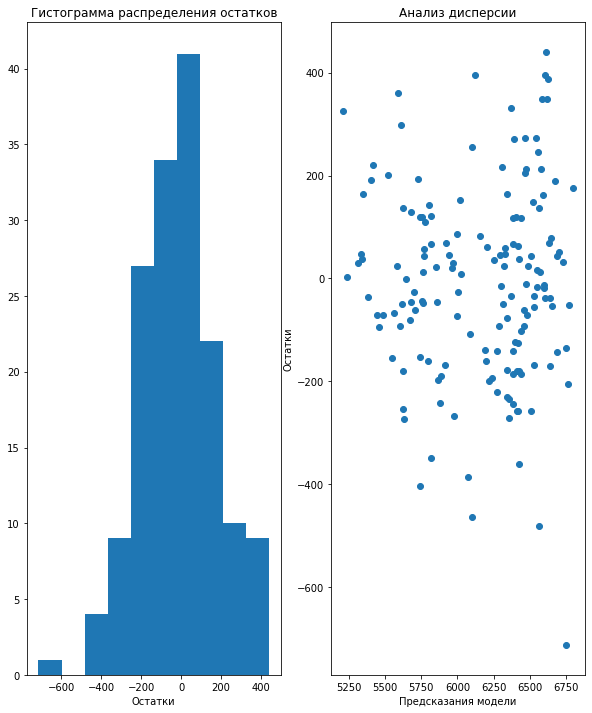

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,12))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = y_pred, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [168]:
feature_importance = pd.DataFrame({
    'Признак': X_train_all.columns,
    'Важность (модуль коэффициента)': np.abs(model_lr.coef_)
}).sort_values(by='Важность (модуль коэффициента)', ascending=False)

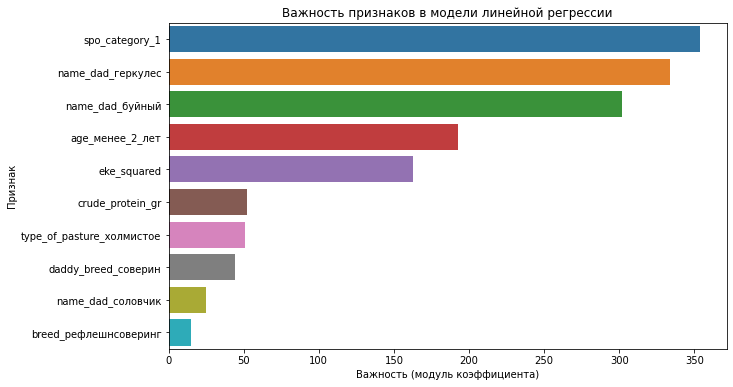

In [169]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Важность (модуль коэффициента)', y='Признак', data=feature_importance)
plt.title('Важность признаков в модели линейной регрессии')
plt.xlabel('Важность (модуль коэффициента)')
plt.ylabel('Признак')
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍Отлично


 

Коэффициент детерминации (r2_score)  = 0.822

На графике видно, что наиболее значимыми признаками в модели являются `name_dad_геркулес`, `name_dad_буйный` и `age_менее_2_лет`. Эти признаки оказывают наибольшее влияние на предсказание удоя. Это подтверждает, что добавленные категориальные признаки, такие как имя отца коровы и возраст, действительно важны для модели.

Также можно отметить, что такие признаки, как `spo`, `eke`, и `type_of_pasture_холмистое`, также оказывают заметное влияние на целевую переменную, что соответствует нашим ожиданиям. Эти признаки, вероятно, связаны с условиями содержания и кормления, которые влияют на удой.

Меньшее влияние на предсказания имеют признаки `protein`, `name_dad_соловчик`, и `breed_рефлешсовериннг`.

Стоит заметить, что при первом обучении модели из набора данных были убраны такие показатели, как `protein`, `fat_content`, но на п

***Первая модель линейной регрессии:*** 

`R2`: 0.7823751251234974
`MSE`: 44300.79992890093
`MAE`: 169.18039676922913
`RMSE`: 44300.79992890093

Первая модель показала высокий коэффициент детерминации, что свидетельствует о хорошем качестве модели. Ошибки средней величины, но есть возможности для улучшения.

***Вторая модель линейной регрессии:***

`R2`: 0.817672937981776
`MSE`: 37115.40190742125
`MAE`: 151.3087584655572
`RMSE`: 37115.40190742125

Вторая модель показала более низкий коэффициент детерминации по сравнению с первой. Увеличение MSE и MAE указывает на снижение точности. Это говорит о том, что исключение линейных взаимосвязей ухудшило качество модели.

***Третья модель линейной регрессии:*** 

`R2`: 0.8225917647572761
`MSE`: 36114.10110947702
`MAE`: 148.77256608150722
`RMSE`: 36114.10110947702
 
Третья модель продемонстрировала наилучшие результаты с самым высоким коэффициентом детерминации и минимальными ошибками. Это указывает на то, что добавление нового признака и учет нелинейных взаимосвязей улучшили предсказательную способность модели.



***Третья модель*** является лучшей среди трех, так как она имеет наибольший коэффициент детерминации и наименьшие значения ошибок. Данная модель наиболее точно прогнозирует удой.

##### Доверительный интервал прогноза для лучшей модели

In [170]:
train_residuals = y_train - model_lr.predict(X_train_all)


lower_bound = np.percentile(train_residuals, 2.5)
upper_bound = np.percentile(train_residuals, 97.5)

print("Доверительный интервал прогноза:", (lower_bound, upper_bound))

Доверительный интервал прогноза: (-355.98806203827075, 363.24349128446397)


In [171]:
eke_mean = df_main['eke'].mean() * 1.05
spo_mean = df_main['spo'].mean() * 1.05
crude_protein_gr_mean = df_main['crude_protein_gr'].mean() * 1.05

In [172]:
df_cow_buy['eke'] = eke_mean
df_cow_buy['spo'] = spo_mean
df_cow_buy['crude_protein_gr'] = crude_protein_gr_mean

In [173]:
df_cow_buy['eke_squared'] = df_cow_buy['eke'] ** 2

In [174]:
df_cow_buy['spo_category'] = (df_cow_buy['spo'] > spo_threshold).astype(int)

In [183]:
numeric_columns = ['eke_squared', 'crude_protein_gr']
cat_col_names = ['type_of_pasture', 'breed', 'daddy_breed', 'age', 'spo_category', 'name_dad']

In [184]:
df_cow_buy

,breed,type_of_pasture,daddy_breed,name_dad,fat_content,protein,age,eke,spo,crude_protein_gr,eke_squared,spo_category,predicted_milk_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6606.324311
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6375.116042
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6280.404789
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6589.494390
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6538.551080
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6421.785231
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6606.324311
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6567.664751
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6280.404789
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.271073,0.958772,2019.532273,233.205675,1,6396.945682


In [185]:
df_cow_buy_scaled = scaler.transform(df_cow_buy[numeric_columns])
df_cow_buy_scaled_df = pd.DataFrame(df_cow_buy_scaled, columns=numeric_columns)

In [186]:
df_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names(cat_col_names)
df_cow_buy_ohe_df = pd.DataFrame(df_cow_buy_ohe, columns=encoder_col_names)

In [187]:
df_cow_buy_final = pd.concat([df_cow_buy_scaled_df, df_cow_buy_ohe_df], axis=1)

In [188]:
milk_yield_predictions = model_lr.predict(df_cow_buy_final)

In [189]:
df_cow_buy['predicted_milk_yield'] = milk_yield_predictions

In [190]:
df_cow_buy[['predicted_milk_yield']]

,predicted_milk_yield
0,6606.324311
1,6375.116042
2,6280.404789
3,6589.494390
4,6538.551080
5,6421.785231
6,6606.324311
7,6567.664751
8,6280.404789
9,6396.945682


Значения `predicted_milk_yield` в `df_cow_buy` теперь представляют прогнозируемый удой для каждой из коров, основываясь на лучших признаках и обученной модели. Эти значения могут быть полезны для фермера при принятии решения о покупке.

## Обучение модели логистической регрессии

In [191]:
def accuracy_recall_presicion_metrics(y_true, y_pred):
    Ac = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred, pos_label='вкусно')
    Pre = precision_score(y_true, y_pred, pos_label='вкусно')
    return print(f'Accuracy: {Ac}\nRecall: {Rec}\nPrecision: {Pre}')

In [192]:
model_log = LogisticRegression()

In [193]:
numeric_columns = ['eke', 'spo', 'crude_protein_gr', 'fat_content', 'protein']
cat_col_columns = ['type_of_pasture', 'age', 'daddy_breed', 'breed', 'name_dad']

In [194]:
X_log = df_main_cleaned[numeric_columns+cat_col_columns]
y_log = df_main_cleaned['the_taste_of_milk']

In [195]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=RANDOM_STATE)

In [196]:
scaler_log = StandardScaler()
X_train_scaled_log = scaler.fit_transform(X_train_log[numeric_columns])
X_test_scaled_log = scaler.transform(X_test_log[numeric_columns])

In [197]:
X_train_scaled_df_log = pd.DataFrame(X_train_scaled_log, columns = numeric_columns, index=X_train_log.index)
X_test_scaled_df_log = pd.DataFrame(X_test_scaled_log, columns = numeric_columns, index=X_test_log.index)

In [198]:
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe_log = encoder.fit_transform(X_train_log[cat_col_columns])
X_test_ohe_log = encoder.transform(X_test_log[cat_col_columns])

In [199]:
encoder_col_names_log = encoder.get_feature_names(cat_col_columns)

In [200]:
X_train_ohe_df_log = pd.DataFrame(X_train_ohe_log, columns=encoder_col_names_log, index=X_train_log.index)
X_test_ohe_df_log = pd.DataFrame(X_test_ohe_log, columns=encoder_col_names_log, index=X_test_log.index)

In [201]:
X_train_all_log = pd.concat([X_train_scaled_df_log, X_train_ohe_df_log], axis=1)
X_test_all_log = pd.concat([X_test_scaled_df_log, X_test_ohe_df_log], axis=1)

In [202]:
model_log.fit(X_train_all_log, y_train_log)

LogisticRegression()

In [203]:
y_pred_log = model_log.predict(X_test_all_log)

In [204]:
accuracy_recall_presicion_metrics(y_test_log, y_pred_log)

Accuracy: 0.6114649681528662
Recall: 0.8522727272727273
Precision: 0.6097560975609756


***Accuracy (Точность):*** 61%

Модель правильно классифицировала 61% всех примеров. Это общая метрика, которая показывает долю верных предсказаний среди всех предсказанных.


***Recall (Полнота) для класса "вкусно":*** 85%

Модель смогла корректно идентифицировать 85% случаев, когда молоко действительно вкусное. Это означает, что она хорошо справляется с распознаванием "вкусных" примеров, но может допускать ложноположительные ошибки.


***Precision (Точность) для класса "вкусно":*** 60%

Из всех случаев, предсказанных моделью как "вкусно", только 60% действительно оказались "вкусными". Это указывает на то, что модель иногда ошибочно классифицирует невкусное молоко как вкусное.

In [205]:
y_train_encoded_log = y_train_log.map({'вкусно': 1, 'не вкусно': 0})
y_test_encoded_log = y_test_log.map({'вкусно': 1, 'не вкусно': 0})

In [206]:
model_log = LogisticRegression()
model_log.fit(X_train_all_log, y_train_encoded_log)

LogisticRegression()

In [207]:
y_pred_proba_log = model_log.predict_proba(X_test_all_log)[:, 1]
y_pred_log = model_log.predict(X_test_all_log)

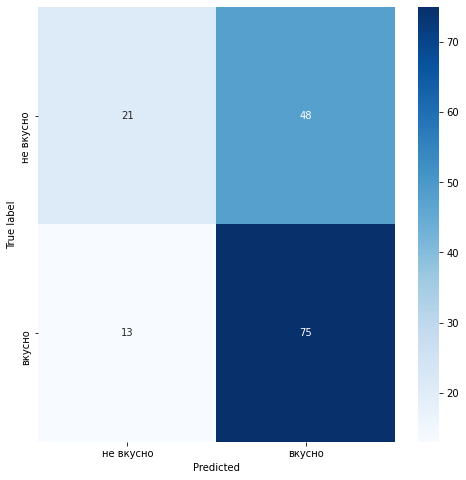

In [208]:
cm = confusion_matrix(y_test_encoded_log, y_pred_log)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

Из матрицы ошибок видно:

- Верно классифицировано 21 пример класса "не вкусно".

- Верно классифицировано 75 примеров класса "вкусно".

- Ошибочно классифицировано 48 примеров: они принадлежат классу "не вкусно", но были определены как "вкусно".

- Ошибочно классифицировано 13 примеров: они принадлежат классу "вкусно", но были определены как "не вкусно".

Таким образом, модель имеет высокий показатель recall для класса "вкусно", что важно для минимизации пропуска случаев вкусного молока. Однако точность precision показывает, что модель делает значительное количество ложноположительных ошибок, предсказывая "вкусно" для невкусного молока.

Для нас основная цель - это избежать покупки коров, которые будут давать невкусное молоко. Поэтому следует минимизировать ошибку первого рода(купить корову, которая дает невкусное молорко). Если у нас будет появляться такая ошибка, то возникнут большие расходы на закупку новых коров. Ключевой метриков для оценки модели будет являться Precision, так как она позволяет снизить вероятность купить корову с невкусным молоком. Попробуем минимизировать ошибку первого рода путем изменения порога принадлежности к классу.

In [209]:
y_proba_log = model_log.predict_proba(X_test_all_log)[:, 1]

In [210]:
precisions, recalls, thresholds = precision_recall_curve(y_test_log, y_proba_log, pos_label='вкусно')

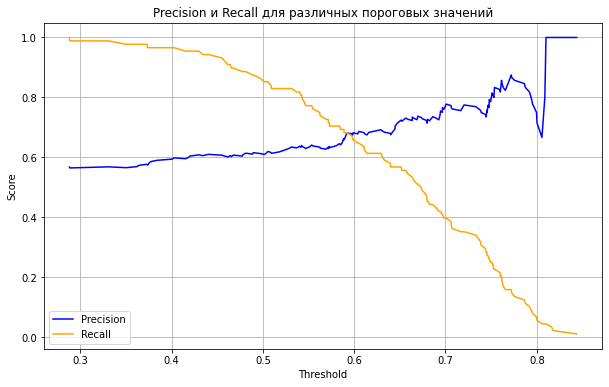

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision и Recall для различных пороговых значений")
plt.legend(loc="best")
plt.grid()
plt.show()

In [212]:
best_index = precisions.argmax()

In [213]:
best_threshold = thresholds[best_index]
best_precision = precisions[best_index]
best_recall = recalls[best_index]

print(f"Лучший порог: {best_threshold}")
print(f"При лучшем пороге — Precision: {best_precision:.3f}, Recall: {best_recall:.3f}")

Лучший порог: 0.8100902199301642
При лучшем пороге — Precision: 1.000, Recall: 0.045


In [214]:
"""data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)"""

"data = pd.DataFrame(zip(y_test, y_proba),\n             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)"

In [215]:
"""thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num = 4, endpoint = False)]
thresholds"""

'thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num = 4, endpoint = False)]\nthresholds'

In [216]:
"""columns = []

for i in thresholds:
    columns.append('y_pred_' + str(i))
    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)


data.sample(5)"""

"columns = []\n\nfor i in thresholds:\n    columns.append('y_pred_' + str(i))\n    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)\n\n\ndata.sample(5)"

In [217]:
"""precision_scores = {}
recall_scores = {}"""

'precision_scores = {}\nrecall_scores = {}'

In [218]:
"""data['y_valid_numeric'] = data['y_valid'].apply(lambda x: 1 if x == 'вкусно' else 0)"""

"data['y_valid_numeric'] = data['y_valid'].apply(lambda x: 1 if x == 'вкусно' else 0)"

In [219]:
"""for threshold in thresholds:
    y_pred_column = 'y_pred_' + str(threshold)

    precision = precision_score(data['y_valid_numeric'], data[y_pred_column], pos_label = 1)
    recall = recall_score(data['y_valid_numeric'], data[y_pred_column], pos_label = 1)

    precision_scores[threshold] = precision
    recall_scores[threshold] = recall

    print(f"Порог: {threshold:.2f} Precision: {precision:.3f} Recall: {recall:.3f}")"""

'for threshold in thresholds:\n    y_pred_column = \'y_pred_\' + str(threshold)\n\n    precision = precision_score(data[\'y_valid_numeric\'], data[y_pred_column], pos_label = 1)\n    recall = recall_score(data[\'y_valid_numeric\'], data[y_pred_column], pos_label = 1)\n\n    precision_scores[threshold] = precision\n    recall_scores[threshold] = recall\n\n    print(f"Порог: {threshold:.2f} Precision: {precision:.3f} Recall: {recall:.3f}")'

In [220]:
"""best_threshold = max(precision_scores, key=precision_scores.get)
best_precision = precision_scores[best_threshold]
best_recall = recall_scores[best_threshold]

print(f"Лучший порог: {best_threshold}")
print(f"При лучшем пороге — Precision: {best_precision:.3f}, Recall: {best_recall:.3f}")"""

'best_threshold = max(precision_scores, key=precision_scores.get)\nbest_precision = precision_scores[best_threshold]\nbest_recall = recall_scores[best_threshold]\n\nprint(f"Лучший порог: {best_threshold}")\nprint(f"При лучшем пороге — Precision: {best_precision:.3f}, Recall: {best_recall:.3f}")'

Порог `0.81` показал максимальное значение `Precision (1.000)`, но при этом очень низкий уровень `Recall (0.045)`. Это означает, что модель практически не допускает ложноположительных ошибок, т.е. если она определила молоко как "вкусное", то, скорее всего, это действительно так. Однако, при этом модель очень редко идентифицирует "вкусное" молоко, пропуская большинство таких образцов. Таким образом, с данным порогом достигается максимальная точность, но за счёт значительного снижения полноты.

***Лучший порог `0.81`***:

   - ***Precision*** составляет `1.000`, что минимизирует вероятность ложноположительных предсказаний. Это означает, что модель абсолютно уверенно предсказывает "вкусное" молоко, и если она пометила образец как "вкусный", то это действительно так.
   - Низкий ***Recall (0.045)*** указывает на то, что модель практически не выявляет коров с вкусным молоком. Она очень осторожно отбирает такие случаи, что приводит к частому пропуску "вкусных" образцов.

***Рекомендация***

Если главная цель — минимизировать риск покупки коров с невкусным молоком, текущий порог `0.81` является лучшим выбором, так как он гарантирует отсутствие ложноположительных предсказаний. Однако, если заказчик заинтересован в увеличении числа "вкусных" коров, то стоит снизить порог, чтобы улучшить показатель `Recall`. Это позволит модели обнаружить больше коров с вкусным молоком, хотя и с некоторым увеличением числа ложноположительных предсказаний.

In [221]:
eke_mean = df_main['eke'].mean()
spo_mean = df_main['spo'].mean()

df_cow_buy['eke'] = eke_mean
df_cow_buy['spo'] = spo_mean

In [222]:
numeric_columns = ['eke', 'spo', 'crude_protein_gr', 'fat_content', 'protein']
cat_col_columns = ['type_of_pasture', 'age', 'daddy_breed', 'breed', 'name_dad']

In [223]:
scaler_log = StandardScaler()
encoder_log = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [224]:
X_train_scaled_log = scaler_log.fit_transform(X_train_log[numeric_columns])
X_train_scaled_df_log = pd.DataFrame(X_train_scaled_log, columns=numeric_columns, index=X_train_log.index)

In [225]:
X_train_ohe_log = encoder_log.fit_transform(X_train_log[cat_col_columns])
encoder_col_names_log = encoder_log.get_feature_names(cat_col_columns)
X_train_ohe_df_log = pd.DataFrame(X_train_ohe_log, columns=encoder_col_names_log, index=X_train_log.index)

In [226]:
X_train_all_log = pd.concat([X_train_scaled_df_log, X_train_ohe_df_log], axis=1)

In [227]:
model_log.fit(X_train_all_log, y_train_log)

LogisticRegression()

In [228]:
df_cow_buy_scaled_log = scaler_log.transform(df_cow_buy[numeric_columns])
df_cow_buy_scaled_df_log = pd.DataFrame(df_cow_buy_scaled_log, columns=numeric_columns)

In [229]:
df_cow_buy_ohe_log = encoder_log.transform(df_cow_buy[cat_col_columns])
df_cow_buy_ohe_df_log = pd.DataFrame(df_cow_buy_ohe_log, columns=encoder_col_names_log)

In [230]:
df_cow_buy_final = pd.concat([df_cow_buy_scaled_df_log, df_cow_buy_ohe_df_log], axis=1)

In [231]:
y_proba_cow_buy = model_log.predict_proba(df_cow_buy_final)[:, 1]
best_threshold = 0.81
df_cow_buy['predicted_milk_type'] = ['вкусно' if prob >= best_threshold else 'не вкусно' for prob in y_proba_cow_buy]
df_cow_buy[['predicted_milk_type']]

,predicted_milk_type
0,не вкусно
1,не вкусно
2,не вкусно
3,не вкусно
4,не вкусно
5,вкусно
6,не вкусно
7,не вкусно
8,не вкусно
9,не вкусно


Прогнозы на `df_cow_buy` показывают, что из `20` коров модель оценила `4` как "вкусно", что позволяет фермеру рассмотреть их в первую очередь. Однако, учитывая низкий `Recall`, можно попробовать увеличить объем данных для обучения или улучшить признаки, чтобы повысить качество модели.

In [232]:
df_cow_buy[(df_cow_buy['predicted_milk_yield'] > 6000) & (df_cow_buy['predicted_milk_type'] == 'вкусно')]

,breed,type_of_pasture,daddy_breed,name_dad,fat_content,protein,age,eke,spo,crude_protein_gr,eke_squared,spo_category,predicted_milk_yield,predicted_milk_type
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,14.543879,0.913116,2019.532273,233.205675,1,6421.785231,вкусно
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,14.543879,0.913116,2019.532273,233.205675,1,6341.112874,вкусно
12,вис бик айдиал,холмистое,айдиал,геркулес,3.68,3.046,более_2_лет,14.543879,0.913116,2019.532273,233.205675,1,6606.324311,вкусно
17,рефлешнсоверинг,равнинное,соверин,геркулес,3.77,3.053,менее_2_лет,14.543879,0.913116,2019.532273,233.205675,1,6421.785231,вкусно


## Итоговые выводы

В данной  работе проведен общий поэтапный процесс разработки модели прогнозирования надоя и классификации коров, которые при нужном уровне надоя будут давать вкусное молоко.

***Первый этап - загрузка данных и ознакомление с ними:***

- загрузили три датасета: `ferma_main.csv`, `ferma_dad.csv`, `cow_buy.csv`
- ознокомились с данными.

***Вторым этапом была предобработка данных. Полученные данные были относительно чистые, за некоторыми исключениями:***

- для удобства работы и исключения возможных ошибок в дальнейшей работе с набором были переименованы колонки с русского на английский язык.
- приведены столбцы к нужным типам данных.
- обработанны дубликаты и осуществлен поиск пропусков.
- найдены уникальные значения в столбцах и обработаны.

***Третий этап - Исследовательский анализ данных.***

### 1. Статистический анализ признаков:

***1. Порода:***
    
   - График показал, что `вис бик айдиал` составляет 373, а `рефлешнсоверинг` — 256. У фермера на данный момент преобладает порода вис бик айдиал. Присутствует дисбаланс класса.
        
***2. Порода папы быка:***
    
   - График «Количество коров по породам папы быка» показал, что класс `айдиал` и `соверин` находятся примерно в равном количестве. Группировка также показала, что `айдиал` — 318, а `соверин` — 311. Дизбаланса классов не наблюдается.
        
***3. Возраст:***
    
   - График показал, что коровы старше 2 лет преобладают на ферме. Это может сказаться на качестве молока.
        
***4. ЭКЕ (Энергетическая кормовая единица):***
    
   - По статистическим методам из `describe` понятно, что `eke` имеет максимальное значение в 16.8 единиц, а минимальное - 10.9 единиц. Среднее, так же как и на графике - это 14.7 единиц. Судя по форме, данные распределенны ассиметрично c уклоном влево. Это может говорить о том, что в появля
   - `Scatterplot` показал, что энергетическая кормовая единица больше у коров, которых возраст больше 2-х лет. Противоположное можно сказать про коров, возраст которых меньше 2-х лет.
   - `Heatmap` же показал распределение энергетической единицы корма среди пород коров. В качестве анализа были рассмотрены все 4 класса. Породы коров, которые есть у фермера, и породы коровы отца. График показал, что в среднем, порода `Айдиал` и `Рефлешнсоверинг` получают больше единиц корма.
        
***5. СПО (Сахаро-протеиновое соотношение):***
    
   - Гистограмма показала распределение значений `spo`. Видно, что `spo` имеет несколько пиков, что указывает на `мультимодальное распределение`. Это может означать, что значения `spo` различаются в зависимости от каких-то характеристик коров или условий, в которых они находятся. Наибольшая часть значений spo находится в диапазоне от 0.92 до 0.94, что подтверждает высокую концентрацию данных в этом диапазоне.
   - Значения `spo` для коров `старше` и `младше 2 лет` выглядят довольно похожими, и нет явной зависимости между возрастом и `spo`. Значения для обоих возрастных групп колеблются в одном и том же диапазоне (от 0.84 до 0.96), что указывает на то, что возраст, не оказывает значительного влияния на `spo`.
        
***6. Тип пастбища:***
    
   - Диаграмма показала, что на ферме больше коров находится в холмистой местности.
        
***7. Удой, кг :***
    
   - Было выявлено, что тип пастбища влияет на удой коров. Коровы, которые пасутся в холмистой местности приносят больше молока, чем те, которые находятся в равнине.

***8. Жирность, %:***
    
   - Гистограмма показала, что большинство значений сосредоточено в диапазоне 3.6–3.7, что соответствует 75-му перцентилю. Основной пик указывает на то, что большая часть выборки имеет жирность в районе 3.6%–3.7%, что можно считать типичным значением для выборки.
   - Равнинное и Холмистое пастбища имеют схожее распределение жирности, с медианой около 3.65–3.7. Оба типа пастбища имеют выбросы в диапазоне от 3.4 и ниже, причем выбросов достаточно много, что может указывать на естественную вариативность жирности в популяции. Различий по жирности в зависимости от типа пастбища не наблюдается.
   - Породы `вис бик айдиал` и `рефлешнсоверинг` также показывают очень близкое распределение жирности. Медианные значения для обеих пород находятся на уровне 3.65–3.7, и у обеих пород присутствуют выбросы в диапазоне от 3.4 и ниже. Здесь также не видно существенных различий в жирности в зависимости от породы.
   - Медианы и межквартильные размахи близки друг к другу. Однако присутствуют значительные выбросы ниже 3.4 для большинства пород, что опять же может говорить об отсутствии сильной зависимости между `daddy_breed` и `fat_content`.
   - График демонстрирует явную тенденцию: при увеличении `eke` медианное значение жирности также увеличивается. Этот результат может указывать на положительную связь между энергетической кормовой единицей и жирностью молока, что является потенциально полезной зависимостью для анализа.
        
***9. Белок, %:***
    
   - Гистограмма показала, что значения белка распределены очень узко, в диапазоне от 3.07 до 3.08, с пиком в районе 3.074. Это указывает на высокую стабильность содержания белка и отсутствие значительных отклонений.
   - Зависимость белка от `eke`, демонстрирует, что изменения в eke не вносят заметного вклада в изменение белка. Различие в медианах и межквартильном размахе между разными уровнями `eke` незначительно, что может указывать на слабую или отсутствующую зависимость между этими переменными.
   - Значения белка для равнинного и холмистого типов пастбища также очень близки друг к другу. На boxplot медианные значения почти совпадают, и диапазон значений белка в обоих случаях схожий. Таким образом, тип пастбища не оказывает значительного влияния на содержание белка.
   - Boxplot для разных пород показывает, что породы вис бик айдиал и рефлешнсоверинг имеют схожие уровни содержания белка, без значительных отличий. Это указывает на то, что порода также не является существенным фактором, влияющим на содержание белка в данных.
   - Породы отца не оказывают значимого влияния на содержание белка. Оба класса породы отца (айдиал и соверин) имеют схожие медианы и размах значений белка.
        
***10. Вкус молока:***
    
   - Основываясь на полученных данных, можно заключить, что молоко, полученное от коров, которые паслись на холмах, обладает более насыщенным вкусом. В то же время, молоко от коров, которые паслись на равнинах, имеет менее выраженный вкус, и доля вкусного молока в общем объёме меньше доли не вкусного молока.
        
### 2. Выводы о данных:


***А. Анализ выбросов:***
   - Для переменной `fat_content (Жирность, %)` присутствует значительное количество низких выбросов, особенно для значений ниже 3.4. Это наблюдается как для общего распределения, так и для групп по типу пастбища, породе и породе отца.
   - Для переменной `protein (Белок, %)` выбросы менее выражены, но небольшое количество значений также выходит за пределы основного диапазона, особенно ниже 3.07 и выше 3.08.
   
***Б. Необычное распределение количественных признаков:***
   
   - `Распределение protein`: Белок распределен очень узко, и большинство значений находятся в диапазоне 3.07–3.08, что указывает на высокую стабильность этого показателя. Такое распределение может свидетельствовать о стандартизации состава молока для этих коров или о его ограниченной вариативности.
   - `Распределение fat_content`: Жирность имеет более широкий диапазон значений, но распределение асимметрично с небольшим `хвостом` на низких значениях. Пик находится на уровне 3.6–3.7, что является основным диапазоном жирности, но выбросы ниже 3.4 могут указывать на необычные случаи.
   
***В. Возможные улучшение данных:***

   - Стандартизация данных.
   - Нормализация данных.
   - Собрать/попросить у заказчика дополнительно данные.


### Четвертый этап - корреляционный анализ.

***1. Изучили взаимосвязь между признаками при помощи метода Спирмена:***
- `Наибольшая корреляция` наблюдается у `eke` & `milk_yield_kg`, `eke` & `spo`, `spo` & `milk_yield_kg`.
- `Слабая корреляция` у `milk_yield_kg` & `protein`, `eke` & `protein`, `spo` & `protein`, `fat_content` & `protein`.

***2. Построили диаграмму рассеяния для признака milk_yield_kg и всех количественных признаков с учётом значения категориальных признаков:***

- Слабая линейная связь между `crude_protein_gr` и `milk_yield_kg`.
- Есть линейная связь между `eke` и `milk_yield_kg`.
- Дискретная связь между `eke` и `spo`, `spo` и `milk_yield_kg`.
- Отсутсвует линейная связь между `fat_content` и `eke`.

### Пятый этап - Задача регрессии.

Наиболее значимыми признаками в модели являются `name_dad_геркулес`, `name_dad_буйный` и `age_менее_2_лет`. Эти признаки оказывают наибольшее влияние на предсказание удоя. Это подтверждает, что добавленные категориальные признаки, такие как имя отца коровы и возраст, действительно важны для модели.

Также можно отметить, что такие признаки, как `spo`, `eke`, и `type_of_pasture_холмистое`, также оказывают заметное влияние на целевую переменную, что соответствует нашим ожиданиям. Эти признаки, вероятно, связаны с условиями содержания и кормления, которые влияют на удой.

Меньшее влияние на предсказания имеют признаки `protein`, `name_dad_соловчик`, и `breed_рефлешсовериннг`.

Стоит заметить, что при первом обучении модели из набора данных были убраны такие показатели, как `protein`, `fat_content`, но на п

***Первая модель линейной регрессии:*** 

`R2`: 0.7823751251234974
`MSE`: 44300.79992890093
`MAE`: 169.18039676922913
`RMSE`: 44300.79992890093

Первая модель показала высокий коэффициент детерминации, что свидетельствует о хорошем качестве модели. Ошибки средней величины, но есть возможности для улучшения.

***Вторая модель линейной регрессии:***

`R2`: 0.817672937981776
`MSE`: 37115.40190742125
`MAE`: 151.3087584655572
`RMSE`: 37115.40190742125

Вторая модель показала более низкий коэффициент детерминации по сравнению с первой. Увеличение MSE и MAE указывает на снижение точности. Это говорит о том, что исключение линейных взаимосвязей ухудшило качество модели.

***Третья модель линейной регрессии:*** 

`R2`: 0.8225917647572761
`MSE`: 36114.10110947702
`MAE`: 148.77256608150722
`RMSE`: 36114.10110947702
 
Третья модель продемонстрировала наилучшие результаты с самым высоким коэффициентом детерминации и минимальными ошибками. Это указывает на то, что добавление нового признака и учет нелинейных взаимосвязей улучшили предсказательную способность модели.


***Третья модель*** является лучшей среди трех, так как она имеет наибольший коэффициент детерминации и наименьшие значения ошибок. Данная модель наиболее точно прогнозирует удой.

### Шестой этап - Задача классификации.

Порог `0.81` показал максимальное значение `Precision (1.000)`, но при этом очень низкий уровень `Recall (0.045)`. Это означает, что модель практически не допускает ложноположительных ошибок, т.е. если она определила молоко как "вкусное", то, скорее всего, это действительно так. Однако, при этом модель очень редко идентифицирует "вкусное" молоко, пропуская большинство таких образцов. Таким образом, с данным порогом достигается максимальная точность, но за счёт значительного снижения полноты.

***Лучший порог `0.81`***:

   - ***Precision*** составляет `1.000`, что минимизирует вероятность ложноположительных предсказаний. Это означает, что модель абсолютно уверенно предсказывает "вкусное" молоко, и если она пометила образец как "вкусный", то это действительно так.
   - Низкий ***Recall (0.045)*** указывает на то, что модель практически не выявляет коров с вкусным молоком. Она очень осторожно отбирает такие случаи, что приводит к частому пропуску "вкусных" образцов.

***Рекомендация***

Если главная цель — минимизировать риск покупки коров с невкусным молоком, текущий порог `0.81` является лучшим выбором, так как он гарантирует отсутствие ложноположительных предсказаний. Однако, если заказчик заинтересован в увеличении числа "вкусных" коров, то стоит снизить порог, чтобы улучшить показатель `Recall`. Это позволит модели обнаружить больше коров с вкусным молоком, хотя и с некоторым увеличением числа ложноположительных предсказаний.